In [1]:
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 942.4/942.4 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.1
    Uninstalling pyproj-3.7.1:
      Successfully uninstalled pyproj-3.7.1
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalle

In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
from google.cloud import storage

project_id = "sharp-matter-449521-u2"
!gcloud config set project {project_id}

Updated property [core/project].


In [3]:
!pip install pyspark py4j

In [4]:
!wget -P /usr/lib/spark/jars/ https://storage.googleapis.com/hadoop-lib/gcs/gcs-connector-hadoop3-latest.jar

--2025-03-22 02:29:10--  https://storage.googleapis.com/hadoop-lib/gcs/gcs-connector-hadoop3-latest.jar
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40713341 (39M) [application/java-archive]
Saving to: ‘/usr/lib/spark/jars/gcs-connector-hadoop3-latest.jar’

gcs-connector-hadoo 100%[===================>]  38.83M   143MB/s    in 0.3s    

2025-03-22 02:29:11 (143 MB/s) - ‘/usr/lib/spark/jars/gcs-connector-hadoop3-latest.jar’ saved [40713341/40713341]



In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from pyspark.sql import SparkSession

In [7]:
spark = SparkSession.builder \
    .appName("BigDataProcessing") \
    .config("spark.jars", "/usr/lib/spark/jars/gcs-connector-hadoop3-latest.jar") \
    .config("spark.hadoop.fs.gs.impl", "com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystem") \
    .config("spark.hadoop.fs.gs.auth.service.account.enable", "true") \
    .getOrCreate()

In [8]:
spark

In [9]:
df_reviews = spark.read.parquet('gs://final_dataset_dat490/dat490_final_dataset.parquet', headers=True, inferSchema=True)

In [10]:
df_reviews.count()

2988811

In [11]:
df_reviews.columns

['gmap_id',
 'customer_name',
 'pics',
 'rating',
 'resp',
 'text',
 'time',
 'user_id',
 'address',
 'avg_rating',
 'category',
 'description',
 'hours',
 'latitude',
 'longitude',
 'business_name',
 'num_of_reviews',
 'price',
 'relative_results',
 'state',
 'url']

In [12]:
# Column were renamed for better readability and understanding
df_reviews = df_reviews.withColumnRenamed('text', "reviews")
df_reviews.columns

['gmap_id',
 'customer_name',
 'pics',
 'rating',
 'resp',
 'reviews',
 'time',
 'user_id',
 'address',
 'avg_rating',
 'category',
 'description',
 'hours',
 'latitude',
 'longitude',
 'business_name',
 'num_of_reviews',
 'price',
 'relative_results',
 'state',
 'url']

In [13]:
df_reviews.printSchema()

root
 |-- gmap_id: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- pics: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- url: array (nullable = true)
 |    |    |    |-- element: string (containsNull = true)
 |-- rating: long (nullable = true)
 |-- resp: struct (nullable = true)
 |    |-- text: string (nullable = true)
 |    |-- time: long (nullable = true)
 |-- reviews: string (nullable = true)
 |-- time: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- address: string (nullable = true)
 |-- avg_rating: double (nullable = true)
 |-- category: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- description: string (nullable = true)
 |-- hours: array (nullable = true)
 |    |-- element: array (containsNull = true)
 |    |    |-- element: string (containsNull = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- business_name: string (nullab

In [14]:
df_reviews.describe().show()

+-------+--------------------+-------------+------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+------------------+-----------------+--------------------+------------------+------+-------+--------------------+
|summary|             gmap_id|customer_name|            rating|             reviews|                time|             user_id|             address|        avg_rating|         description|          latitude|        longitude|       business_name|    num_of_reviews| price|  state|                 url|
+-------+--------------------+-------------+------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+------------------+-----------------+--------------------+------------------+------+-------+--------------------+
|  count|             2988811|      2988811|           2988304|             2984135|             

In [15]:
from pyspark.sql.functions import col, sum

df_reviews.select([sum(col(c).isNull().cast('int')).alias(c) for c in df_reviews.columns]).show()

+-------+-------------+-------+------+-------+-------+----+-------+-------+----------+--------+-----------+------+--------+---------+-------------+--------------+-------+----------------+-----+---+
|gmap_id|customer_name|   pics|rating|   resp|reviews|time|user_id|address|avg_rating|category|description| hours|latitude|longitude|business_name|num_of_reviews|  price|relative_results|state|url|
+-------+-------------+-------+------+-------+-------+----+-------+-------+----------+--------+-----------+------+--------+---------+-------------+--------------+-------+----------------+-----+---+
|      0|            0|2067337|   507|2482952|   4676|   0|    507|  17035|         0|    2674|    2173290|422873|       0|        0|            6|             0|2140651|          158587|    0|  0|
+-------+-------------+-------+------+-------+-------+----+-------+-------+----------+--------+-----------+------+--------+---------+-------------+--------------+-------+----------------+-----+---+



In [16]:
# Checking columns containing the most amount of null values
for col in ['pics', 'resp', 'description', 'hours', 'price', 'relative_results']:
  df_reviews.select(col).distinct().show(5, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [17]:
df_reviews.select('price').distinct().show(truncate=False)

+-----+
|price|
+-----+
|$$   |
|$$$  |
|$$$$ |
|₩₩₩₩ |
|₩₩   |
|₩₩₩  |
|$    |
|₩    |
|NULL |
+-----+



From all the columns which contains the most amount of null values, `pics`, `resp`, `description` and `relative_results` columns does not contain any information that will be of value throughout the project. Also, `price` column does not have the price range i.e., amount of $ sign(s), on the same scale. Therefore, removing all these columns is necessary.

**NOTE:** We have decided to not hours column for now as it can be beneficial to know which businesses operate on which days.

In [18]:
# Before removing null values, we can drop unnecessary columns

df_reviews = df_reviews.drop('relative_results', 'pics', 'resp', 'price', 'description')
df_reviews.columns

['gmap_id',
 'customer_name',
 'rating',
 'reviews',
 'time',
 'user_id',
 'address',
 'avg_rating',
 'category',
 'hours',
 'latitude',
 'longitude',
 'business_name',
 'num_of_reviews',
 'state',
 'url']

Now we can remove null values from the following columns: `rating`, `text`, `user_id`, `address`, `category`.
For now, we are keeping the null values in `hours` column because it contains about 15% null values, which is a significant amount. By removing null values, we can lose a significant amount of rows from our dataframe.

In [19]:
df_reviews = df_reviews.na.drop(subset=["business_name", "category", "user_id", "address", "rating", "reviews"])


In [20]:
from pyspark.sql.functions import col, sum
df_reviews.select([sum(col(c).isNull().cast('int')).alias(c) for c in df_reviews.columns]).show()

+-------+-------------+------+-------+----+-------+-------+----------+--------+------+--------+---------+-------------+--------------+-----+---+
|gmap_id|customer_name|rating|reviews|time|user_id|address|avg_rating|category| hours|latitude|longitude|business_name|num_of_reviews|state|url|
+-------+-------------+------+-------+----+-------+-------+----------+--------+------+--------+---------+-------------+--------------+-----+---+
|      0|            0|     0|      0|   0|      0|      0|         0|       0|416393|       0|        0|            0|             0|    0|  0|
+-------+-------------+------+-------+----+-------+-------+----------+--------+------+--------+---------+-------------+--------------+-----+---+



In [21]:
# Exploring other columns
for col in ['url', 'category', 'time', 'address', 'user_id']:
  df_reviews.select(col).distinct().show(5, truncate=False)

+----------------------------------------------------------------------------------------------------------------+
|url                                                                                                             |
+----------------------------------------------------------------------------------------------------------------+
|https://www.google.com/maps/place//data=!4m2!3m1!1s0x87d8a848bdcb7227:0x3b8af397dde97b03?authuser=-1&hl=en&gl=us|
|https://www.google.com/maps/place//data=!4m2!3m1!1s0x87df0db5d0cdc371:0x9a9a59181344360c?authuser=-1&hl=en&gl=us|
|https://www.google.com/maps/place//data=!4m2!3m1!1s0x87df448f1a3855b5:0xba361499aa33d3c5?authuser=-1&hl=en&gl=us|
|https://www.google.com/maps/place//data=!4m2!3m1!1s0x87df4d87b1ceb4db:0x306db2e3f396049c?authuser=-1&hl=en&gl=us|
|https://www.google.com/maps/place//data=!4m2!3m1!1s0x87df53d4262dc8bd:0x5f4a1ed10fa201b4?authuser=-1&hl=en&gl=us|
+-------------------------------------------------------------------------------

It seems that the `url`, `address` and `user_id` won't be useful in further analysis. `url` contains the Google maps link of the business's location, `address` contains the address of the business, and `user_id` is random numbers assigned to the users. Therefore, we can remove these column.

In [22]:
df_reviews = df_reviews.drop('url', 'address', 'user_id')
df_reviews.columns

['gmap_id',
 'customer_name',
 'rating',
 'reviews',
 'time',
 'avg_rating',
 'category',
 'hours',
 'latitude',
 'longitude',
 'business_name',
 'num_of_reviews',
 'state']

The `category` column is an array of strings. Each column provides the type of business and the kind of goods or services that they provide. But this might be hard to use further in EDA and creating models. Therefore, we have to create **standard categories** for each business.

First, we have to make the array of strings as one single string for easier parsing.

In [23]:
from pyspark.sql.functions import col, concat_ws

# Converting array to string
df_reviews = df_reviews.withColumn("category", concat_ws(", ", col("category")))

In [24]:
df_reviews.select("category").printSchema()

root
 |-- category: string (nullable = false)



Now that we have converted the category column from an array of strings to string format, we can map `category` column into standard categories by finding key words in each string of each row.

In [25]:
# Most common strings in the category column
from pyspark.sql.functions import explode, split, col

df_words = df_reviews.withColumn("word", explode(split(col("category"), ",\s*")))

df_word_count = df_words.groupBy("word").count().orderBy(col("count").desc())
df_word_count.count()
df_word_count.show(truncate=False)

+--------------------+------+
|word                |count |
+--------------------+------+
|Restaurant          |294350|
|Fast food restaurant|144254|
|Takeout Restaurant  |97114 |
|American restaurant |93167 |
|Grocery store       |89089 |
|Auto repair shop    |87464 |
|Bar                 |87070 |
|Gas station         |81229 |
|Breakfast restaurant|79523 |
|Sandwich shop       |79476 |
|Pizza restaurant    |78050 |
|Coffee shop         |77102 |
|Tourist attraction  |73587 |
|Park                |69382 |
|Mexican restaurant  |68406 |
|Clothing store      |66353 |
|Caterer             |65556 |
|Beauty salon        |60008 |
|Convenience store   |59424 |
|Hamburger restaurant|58353 |
+--------------------+------+
only showing top 20 rows



Based on these common strings, we can create a dictionary to map the `category` column.

In [26]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

# Defining broad category groups
category_mapping = {
    # Restaurants & Food
    "restaurant": "Restaurant",
    "food": "Restaurant",
    "deli": "Restaurant",
    "takeout": "Restaurant",
    "sandwich": "Restaurant",
    "cafe": "Cafe",
    "coffee": "Cafe",
    "bakery": "Bakery",
    "ice cream": "Bakery",
    "diner": "Restaurant",

    # Hotels & Lodging
    "hotel": "Hotel",
    "motel": "Hotel",
    "lodging": "Hotel",

    # Beauty & Wellness
    "salon": "Beauty & Wellness",
    "spa": "Beauty & Wellness",
    "barber": "Beauty & Wellness",
    "nail": "Beauty & Wellness",

    # Grocery & Retail
    "grocery": "Grocery Store",
    "supermarket": "Grocery Store",
    "market": "Grocery Store",
    "retail": "Retail",
    "shopping": "Retail",
    "store": "Retail",
    "mall": "Retail",
    "shop": "Retail",
    "supplier": "Retail",
    "florist": "Retail",
    "department": "Retail",
    "wholesale": "Retail",

    # Fitness & Healthcare
    "gym": "Fitness",
    "fitness": "Fitness",
    "sports": "Fitness",
    "golf": "Fitness",
    "hiking": "Fitness",
    "field": "Fitness",
    "recreation": "Fitness",
    "health": "Healthcare",
    "pharmacy": "Healthcare",
    "clinic": "Healthcare",
    "hospital": "Healthcare",
    "dentist": "Healthcare",
    "doctor": "Healthcare",
    "therapist": "Healthcare",
    "chiropractor": "Healthcare",
    "medical": "Healthcare",
    "veterinarian": "Healthcare",
    "pet": "Pet Services",
    "groomer": "Pet Services",

    # Events & Venues
    "venue": "Event Venue",
    "event": "Event Venue",
    "complex": "Event Venue",
    "hall": "Event Venue",
    "banquet": "Event Venue",
    "wedding": "Event Venue",

    # Automotive Services
    "automotive": "Automotive",
    "auto": "Automotive",
    "car wash": "Automotive",
    "car repair": "Automotive",
    "car service": "Automotive",
    "car": "Automotive",
    "dealer": "Automotive",
    "repair": "Automotive",
    "service": "Automotive",
    "auto": "Automotive",
    "tire": "Automotive",
    "body": "Automotive",
    "gas": "Automotive",

    # Transportation & Travel
    "transport": "Transportation",
    "logistics": "Transportation",
    "shipping": "Transportation",
    "bus": "Transportation",
    "station": "Transportation",
    "airport": "Transportation",

    # Real Estate & Construction
    "real estate": "Real Estate",
    "property": "Real Estate",
    "housing": "Real Estate",
    "house": "Real Estate",
    "condominium": "Real Estate",
    "construction": "Construction",
    "builder": "Construction",
    "storage": "Storage Services",

    # Finance & Business Services
    "insurance": "Insurance",
    "finance": "Finance",
    "bank": "Finance",
    "accounting": "Finance",
    "company": "Business Services",
    "business": "Business Services",
    "service": "Business Services",
    "office": "Business Services",

    # Legal & Consulting
    "consulting": "Consulting",
    "agency": "Consulting",
    "legal": "Legal Services",
    "law": "Legal Services",
    "court": "Legal Services",
    "attorney": "Legal Services",

    # Education & Learning
    "school": "Education",
    "university": "Education",
    "college": "Education",
    "library": "Education",

    # Tourism & Attractions
    "tourist": "Tourism & Attractions",
    "attraction": "Tourism & Attractions",
    "museum": "Tourism & Attractions",
    "art": "Tourism & Attractions",
    "lake": "Tourism & Attractions",
    "river": "Tourism & Attractions",
    "garden": "Tourism & Attractions",

    # Religious Institutions
    "church": "Religious Institution",
    "baptist": "Religious Institution",
    "catholic": "Religious Institution",

    # Entertainment
    "entertainment": "Entertainment",
    "music": "Entertainment",
    "cinema": "Entertainment",
    "theater": "Entertainment",

    # Miscellaneous
    "organization": "Non-Profit",
    "non-profit": "Non-Profit",
    "facility": "Non-Profit",
    "laundromat": "Laundry Services",
    "park": "Public Services",
    "animal control": "Public Services",

    # Bars & Nightlife
    "bar": "Bar",
    "pub": "Bar",
    "brewery": "Bar",
}

# Defining UDF to map categories
def standardize_category(categories):
    categories = categories.lower()
    for keyword, standard in category_mapping.items():
        if keyword in categories:
            return standard
    return "Other"  # Default category if no match

standardize_category_udf = udf(standardize_category, StringType())

In [27]:
from pyspark.sql.functions import col
df_reviews = df_reviews.withColumn("standard_category", standardize_category_udf(col("category")))

In [28]:
df_reviews.select("category", "standard_category").show(20, truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------+-----------------+
|category                                                                                                                                          |standard_category|
+--------------------------------------------------------------------------------------------------------------------------------------------------+-----------------+
|American restaurant, Bar, Bar & grill, Cocktail bar, Sports bar                                                                                   |Restaurant       |
|Bus depot, Transportation service                                                                                                                 |Business Services|
|Volleyball club, Corporate office                                                                                                                 |Business Services

In [29]:
# Number of businesses in each standard category
df_reviews.groupBy("standard_category").count().orderBy(col("count").desc()).show(truncate=False)

+---------------------+------+
|standard_category    |count |
+---------------------+------+
|Retail               |785347|
|Restaurant           |714065|
|Beauty & Wellness    |170592|
|Automotive           |163933|
|Other                |155102|
|Business Services    |105414|
|Healthcare           |102018|
|Grocery Store        |101611|
|Tourism & Attractions|91785 |
|Fitness              |71465 |
|Bar                  |58953 |
|Public Services      |53932 |
|Event Venue          |53574 |
|Religious Institution|49583 |
|Hotel                |46606 |
|Cafe                 |44448 |
|Bakery               |32193 |
|Real Estate          |26587 |
|Non-Profit           |25564 |
|Pet Services         |15990 |
+---------------------+------+
only showing top 20 rows



In [30]:
# Exploring what kind of businesses are in the "Other" standard category
df_reviews.select("category").filter(col("standard_category") == "Other").show(20, truncate=False)

+-------------------------------------------------+
|category                                         |
+-------------------------------------------------+
|Fixed-base operator                              |
|Mortgage lender, Mortgage broker                 |
|Country club                                     |
|Laser tag center, Paintball center               |
|Off-road race track                              |
|Country club                                     |
|Lounge                                           |
|Heating contractor                               |
|Senior citizen center                            |
|Dry cleaner                                      |
|Community center                                 |
|Dry cleaner                                      |
|Roller skating rink                              |
|Religious destination                            |
|Farm, Christmas tree farm, Orchard, Pumpkin patch|
|Night club                                       |
|Salvage yar

With the help of our dictionary "category_mapping", we were able to map about 95% of the `category` column into `standard_category`.

Before processing the `hours` column, we have to deal with the null values. For now, we can impute the null values with a string value "NA".

In [31]:
from pyspark.sql.functions import when, col, array, lit

df_reviews = df_reviews.withColumn(
    "hours",
    when(col("hours").isNull(), array(array(lit("NA")))).otherwise(col("hours"))
)

Now, we can process the `hours` column. It would be beneficial to know on which days does a business operate. For that, we can create binary columns for all the weekdays (Monday to Sunday), where 0 and 1 represent whether a business is closed on that weekday or not respectively.

In [32]:
from pyspark.sql.functions import udf
from pyspark.sql.types import MapType, IntegerType, ArrayType, StringType

def get_open_days(hours_array):
    open_days = {
        "Monday": 0,
        "Tuesday": 0,
        "Wednesday": 0,
        "Thursday": 0,
        "Friday": 0,
        "Saturday": 0,
        "Sunday": 0
    }

    if hours_array == [["NA"]]: # Handling "NA" case
        return "NA"

    if hours_array:
        for day_hours in hours_array:
            if len(day_hours) == 2:
                day, hours = day_hours
                if hours.lower() != "closed":
                    open_days[day] = 1

    return open_days

get_open_days_udf = udf(get_open_days, MapType(StringType(), IntegerType()))

# Creating new column with the dictionary of open days
df_reviews = df_reviews.withColumn("open_days_map", get_open_days_udf(col("hours")))

In [33]:
df_reviews.select("hours", "open_days_map").show(10, truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------+
|hours                                                                                                                                                                         |open_days_map                                                                                      |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------+
|[[Saturday, 11AM–11PM], [Sunday, 11AM–10PM], [Monday, 3–10PM], [Tuesday, 3–10PM], [Wednesday, 3–10PM], [Thursday, 3–10PM], [Friday, 3–11PM]]                            

We can see that our mapping is successful. Now, we can create individual columns for each weekday.

In [34]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
for day in days:
    df_reviews = df_reviews.withColumn(day, col("open_days_map").getItem(day))

In [35]:
df_reviews.select("hours", *days).show(10, truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------+-------+---------+--------+------+--------+------+
|hours                                                                                                                                                                         |Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday|
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------+-------+---------+--------+------+--------+------+
|[[Saturday, 11AM–11PM], [Sunday, 11AM–10PM], [Monday, 3–10PM], [Tuesday, 3–10PM], [Wednesday, 3–10PM], [Thursday, 3–10PM], [Friday, 3–11PM]]                                  |1     |1      |1        |1       |1     |1       |1     |
|[[Wednesday, 6AM–8PM], [Thursday, 6AM–8PM], [Friday, 6AM–8PM], 

Now we can drop `open_days_map` and `hours` columns.

In [36]:
df_reviews = df_reviews.drop("open_days_map", "hours")
df_reviews.columns

['gmap_id',
 'customer_name',
 'rating',
 'reviews',
 'time',
 'avg_rating',
 'category',
 'latitude',
 'longitude',
 'business_name',
 'num_of_reviews',
 'state',
 'standard_category',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday']

In [37]:
from pyspark.sql.functions import col, sum

df_reviews.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_reviews.columns])

DataFrame[gmap_id: bigint, customer_name: bigint, rating: bigint, reviews: bigint, time: bigint, avg_rating: bigint, category: bigint, latitude: bigint, longitude: bigint, business_name: bigint, num_of_reviews: bigint, state: bigint, standard_category: bigint, Monday: bigint, Tuesday: bigint, Wednesday: bigint, Thursday: bigint, Friday: bigint, Saturday: bigint, Sunday: bigint]

In our dataframe, the null/na values means unknown hours, so the best approach is to leave the weekdays (Monday to Sunday columns) as is rather rather than imputing the values, as imputing can introduce bias.  
We will decide how to use "NA" based on its specific use case.   

Now, we can process the `time` column. The column has Unix Time Stamp. We can extract week, month and year from this column, which will help us in EDA, specially in time-series analysis.
We can use the pyspark function "from_unixtime" to do this.

In [38]:
from pyspark.sql.functions import from_unixtime, weekofyear, month, year, col

# Converting Unix Timestamp to Timestamp Type
df_reviews = df_reviews.withColumn("timestamp", from_unixtime(col("time")))

# Extracting Week, Month, and Year
df_reviews = df_reviews.withColumn("week", weekofyear(col("timestamp")))
df_reviews = df_reviews.withColumn("month", month(col("timestamp")))
df_reviews = df_reviews.withColumn("year", year(col("timestamp")))

In [39]:
df_reviews.select("time", "timestamp", "week", "month", "year").show(10)

+-------------+--------------------+----+-----+-----+
|         time|           timestamp|week|month| year|
+-------------+--------------------+----+-----+-----+
|1552844416872|+51177-09-06 07:2...|  36|    9|51177|
|1611751556746|+53044-05-16 21:4...|  20|    5|53044|
|1549393302812|+51068-04-26 20:3...|  17|    4|51068|
|1622350656749|+53380-03-30 16:1...|  13|    3|53380|
|1597026526970|+52577-10-03 07:4...|  40|   10|52577|
|1610474128333|+53003-11-23 20:3...|  47|   11|53003|
|1616065185072|+53181-01-25 03:5...|   4|    1|53181|
|1626723490939|+53518-10-26 04:2...|  43|   10|53518|
|1538712187563|+50729-11-06 20:0...|  45|   11|50729|
|1622058689197|+53370-12-29 10:0...|  52|   12|53370|
+-------------+--------------------+----+-----+-----+
only showing top 10 rows



The year column is showing the wrong year. This happens because of the different scale of timestamp. The timestamps we have are likely in milliseconds. We can divide it by 1000 to convert milliseconds in seconds.

In [40]:
for column in ['timestamp', 'week', 'month', 'year']:
  df_reviews.drop(column)

In [41]:
from pyspark.sql.types import LongType

# Converting Milliseconds to Seconds and then to Timestamp
df_reviews = df_reviews.withColumn("time_seconds", (col("time") / 1000).cast(LongType()))
df_reviews = df_reviews.withColumn("timestamp", from_unixtime(col("time_seconds")))

# Extracting Week, Month, and Year
df_reviews = df_reviews.withColumn("week", weekofyear(col("timestamp")))
df_reviews = df_reviews.withColumn("month", month(col("timestamp")))
df_reviews = df_reviews.withColumn("year", year(col("timestamp")))

In [42]:
df_reviews.select("time", "timestamp", "week", "month", "year").show(10)

+-------------+-------------------+----+-----+----+
|         time|          timestamp|week|month|year|
+-------------+-------------------+----+-----+----+
|1552844416872|2019-03-17 17:40:16|  11|    3|2019|
|1611751556746|2021-01-27 12:45:56|   4|    1|2021|
|1549393302812|2019-02-05 19:01:42|   6|    2|2019|
|1622350656749|2021-05-30 04:57:36|  21|    5|2021|
|1597026526970|2020-08-10 02:28:46|  33|    8|2020|
|1610474128333|2021-01-12 17:55:28|   2|    1|2021|
|1616065185072|2021-03-18 10:59:45|  11|    3|2021|
|1626723490939|2021-07-19 19:38:10|  29|    7|2021|
|1538712187563|2018-10-05 04:03:07|  40|   10|2018|
|1622058689197|2021-05-26 19:51:29|  21|    5|2021|
+-------------+-------------------+----+-----+----+
only showing top 10 rows



In [43]:
df_reviews.printSchema()

root
 |-- gmap_id: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- rating: long (nullable = true)
 |-- reviews: string (nullable = true)
 |-- time: long (nullable = true)
 |-- avg_rating: double (nullable = true)
 |-- category: string (nullable = false)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- business_name: string (nullable = true)
 |-- num_of_reviews: long (nullable = true)
 |-- state: string (nullable = true)
 |-- standard_category: string (nullable = true)
 |-- Monday: integer (nullable = true)
 |-- Tuesday: integer (nullable = true)
 |-- Wednesday: integer (nullable = true)
 |-- Thursday: integer (nullable = true)
 |-- Friday: integer (nullable = true)
 |-- Saturday: integer (nullable = true)
 |-- Sunday: integer (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- week: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- time_seconds: long (null

In [44]:
print(f"shape: {df_reviews.count()}, {len(df_reviews.columns)}")

shape: 2964196, 25


## EDA

Importing necessary libraries for pandas vizualizations.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

We think adding a region column would be beneficial for our analysis, as the visualizations on all 50 states will be too cluttered. Dividing states into regions can help in capturing the broader geographic trends and patterns, simplify comparisons, and highlight regional differences more effectively.

In [46]:
df_reviews.select('state').distinct().show(50)

+--------------+
|         state|
+--------------+
|      Illinois|
|      Michigan|
|        Kansas|
|          Iowa|
|       Indiana|
| New_Hampshire|
|   Connecticut|
|       Vermont|
|      New_York|
|  Rhode_Island|
| Massachusetts|
|    New_Jersey|
|         Maine|
|      Delaware|
|       Georgia|
|       Florida|
|North_Carolina|
|      Maryland|
|South_Carolina|
|      Arkansas|
|      Oklahoma|
|       Alabama|
|      Kentucky|
|     Louisiana|
|   Mississippi|
|     Tennessee|
|         Texas|
|        Alaska|
|       Arizona|
|    California|
|        Hawaii|
|      Colorado|
|          Ohio|
|      Nebraska|
|        Nevada|
|  South_Dakota|
|      Missouri|
|       Montana|
|  North_Dakota|
|     Wisconsin|
|          Utah|
|        Oregon|
|    Washington|
|       Wyoming|
|    New_Mexico|
|     Minnesota|
|  Pennsylvania|
| West_Virginia|
|      Virginia|
|         Idaho|
+--------------+



In [47]:
state_to_region = {
    "Maine": "Northeast", "New_Hampshire": "Northeast", "Vermont": "Northeast",
    "Massachusetts": "Northeast", "Rhode_Island": "Northeast", "Connecticut": "Northeast",
    "New_York": "Northeast", "New_Jersey": "Northeast", "Pennsylvania": "Northeast",

    "Ohio": "Midwest", "Indiana": "Midwest", "Illinois": "Midwest",
    "Michigan": "Midwest", "Wisconsin": "Midwest", "Minnesota": "Midwest",
    "Iowa": "Midwest", "Missouri": "Midwest", "North_Dakota": "Midwest",
    "South_Dakota": "Midwest", "Nebraska": "Midwest", "Kansas": "Midwest",

    "Delaware": "Southeast", "Maryland": "Southeast", "Virginia": "Southeast",
    "West_Virginia": "Southeast", "Kentucky": "Southeast", "North_Carolina": "Southeast",
    "South_Carolina": "Southeast", "Tennessee": "Southeast", "Georgia": "Southeast",
    "Alabama": "Southeast", "Mississippi": "Southeast", "Arkansas": "Southeast",
    "Louisiana": "Southeast", "Florida": "Southeast",

    "Texas": "Southwest", "Oklahoma": "Southwest", "New_Mexico": "Southwest", "Arizona": "Southwest",
    "Montana": "West", "Idaho": "West", "Wyoming": "West", "Colorado": "West",
    "Utah": "West", "Nevada": "West", "California": "West", "Oregon": "West",
    "Washington": "West", "Alaska": "West", "Hawaii": "West"
}
from pyspark.sql import functions as F
from pyspark.sql.types import StringType
def get_region(state):
    return state_to_region.get(state)

region_udf = F.udf(get_region, StringType())


df_reviews = df_reviews.withColumn("region", region_udf(F.col("state")))
from pyspark.sql.functions import count
df_region = df_reviews.groupBy("region", "state").agg(count("*").alias("total_ratings"))

In [48]:
df_region.show(50)

+---------+--------------+-------------+
|   region|         state|total_ratings|
+---------+--------------+-------------+
|  Midwest|       Indiana|        58309|
|  Midwest|      Michigan|        95748|
|  Midwest|          Iowa|        26010|
|  Midwest|      Illinois|       104775|
|  Midwest|        Kansas|        25340|
|Northeast|         Maine|        12580|
|Northeast|      New_York|       157920|
|Northeast| Massachusetts|        51758|
|Northeast|   Connecticut|        27278|
|Northeast|  Rhode_Island|         8940|
|Northeast| New_Hampshire|        13012|
|Northeast|       Vermont|         5030|
|Northeast|    New_Jersey|        72307|
|Southeast|      Delaware|         8049|
|Southeast|       Georgia|        96480|
|Southeast|       Florida|       222564|
|Southeast|South_Carolina|        48194|
|Southeast|      Maryland|        45117|
|Southeast|North_Carolina|        95973|
|Southwest|      Oklahoma|        38632|
|Southeast|     Tennessee|        63747|
|Southeast|     

In [49]:
import pandas as pd
df_pandas = df_region.toPandas()
df_pandas_region_grouped = df_pandas.groupby("region")["total_ratings"].sum()
df_pandas_region_grouped = pd.DataFrame(df_pandas_region_grouped)
df_pandas_region_grouped = df_pandas_region_grouped.sort_values(by = 'total_ratings').reset_index()

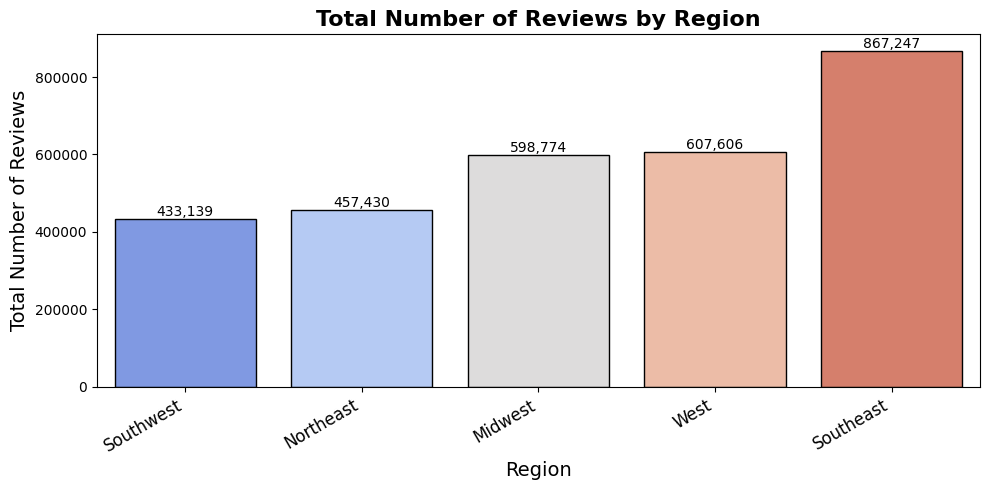

In [50]:
plt.figure(figsize=(10, 5))


ax = sns.barplot(
    data=df_pandas_region_grouped,
    x="region",
    y="total_ratings",
    palette="coolwarm",
    edgecolor="black",
    errorbar=None
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=12)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height()):,}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=10
    )

plt.xlabel("Region", fontsize=14)
plt.ylabel("Total Number of Reviews", fontsize=14)
plt.title("Total Number of Reviews by Region", fontsize=16, fontweight='bold')

plt.tight_layout()

plt.show()

For EDA in the next few sections, it is best to remove "NA" values from the weekdays (Monday to Sunday) columns, and store it in a new dataframe. This will immensely help in EDA and visualizations as we don't have to worry about the "NA" values.  

In [51]:
df_clean = df_reviews.dropna(subset=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

### Business Open Rates by State

Visualizing the number of businesses which are closed/open per day can help in analyzing the operating hours of businesses.

In [52]:
from pyspark.sql.functions import sum, col

closed_counts = df_clean.select(
    sum(when(col("Monday") == 0, 1).otherwise(0)).alias("Monday_closed"),
    sum(when(col("Tuesday") == 0, 1).otherwise(0)).alias("Tuesday_closed"),
    sum(when(col("Wednesday") == 0, 1).otherwise(0)).alias("Wednesday_closed"),
    sum(when(col("Thursday") == 0, 1).otherwise(0)).alias("Thursday_closed"),
    sum(when(col("Friday") == 0, 1).otherwise(0)).alias("Friday_closed"),
    sum(when(col("Saturday") == 0, 1).otherwise(0)).alias("Saturday_closed"),
    sum(when(col("Sunday") == 0, 1).otherwise(0)).alias("Sunday_closed")
)

open_counts = df_clean.select(
    sum(when(col("Monday") == 1, 1).otherwise(0)).alias("Monday_open"),
    sum(when(col("Tuesday") == 1, 1).otherwise(0)).alias("Tuesday_open"),
    sum(when(col("Wednesday") == 1, 1).otherwise(0)).alias("Wednesday_open"),
    sum(when(col("Thursday") == 1, 1).otherwise(0)).alias("Thursday_open"),
    sum(when(col("Friday") == 1, 1).otherwise(0)).alias("Friday_open"),
    sum(when(col("Saturday") == 1, 1).otherwise(0)).alias("Saturday_open"),
    sum(when(col("Sunday") == 1, 1).otherwise(0)).alias("Sunday_open")
)

We can now use Pandas dataframe, which will enable us to use other visualization libraries Matplotlib and Seaborn.

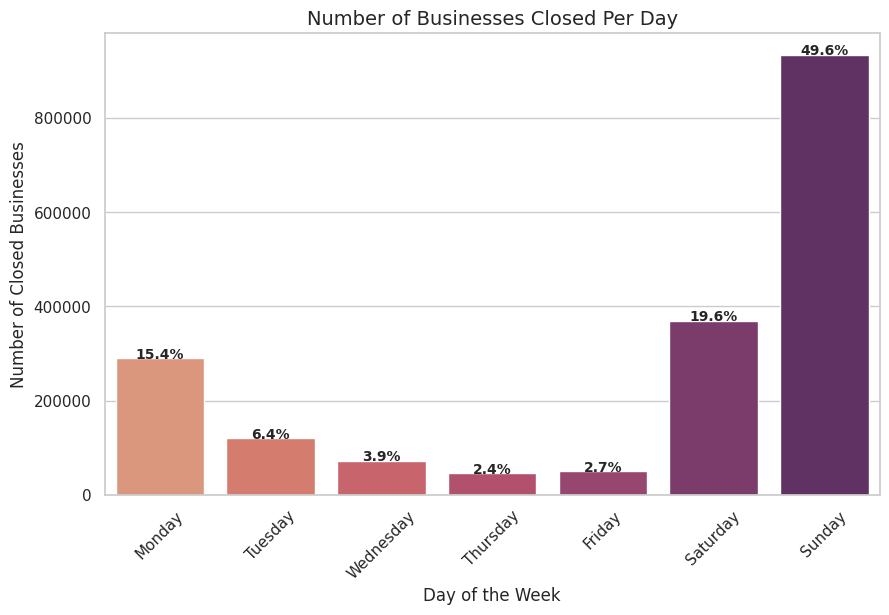

In [53]:
# Visualizing distribution of businesses closed across the weekdays
# Converting PySpark DataFrame to Pandas to use Seaborn
closed_counts_pd = closed_counts.toPandas()
closed_counts_melted = closed_counts_pd.melt(var_name="Day", value_name="Closed Businesses")
closed_counts_melted["Day"] = closed_counts_melted["Day"].str.replace("_closed", "")
total_businesses = closed_counts_melted["Closed Businesses"].sum()

closed_counts_melted["Percentage"] = (closed_counts_melted["Closed Businesses"] / total_businesses) * 100

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=closed_counts_melted, x="Day", y="Closed Businesses", palette='flare')

plt.title("Number of Businesses Closed Per Day", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Closed Businesses", fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    percentage = closed_counts_melted.loc[closed_counts_melted["Closed Businesses"] == height, "Percentage"].values
    if len(percentage) > 0:
        ax.text(p.get_x() + p.get_width() / 2, height + 100, f'{percentage[0]:.1f}%', ha="center", fontsize=10, fontweight="bold")

plt.show()

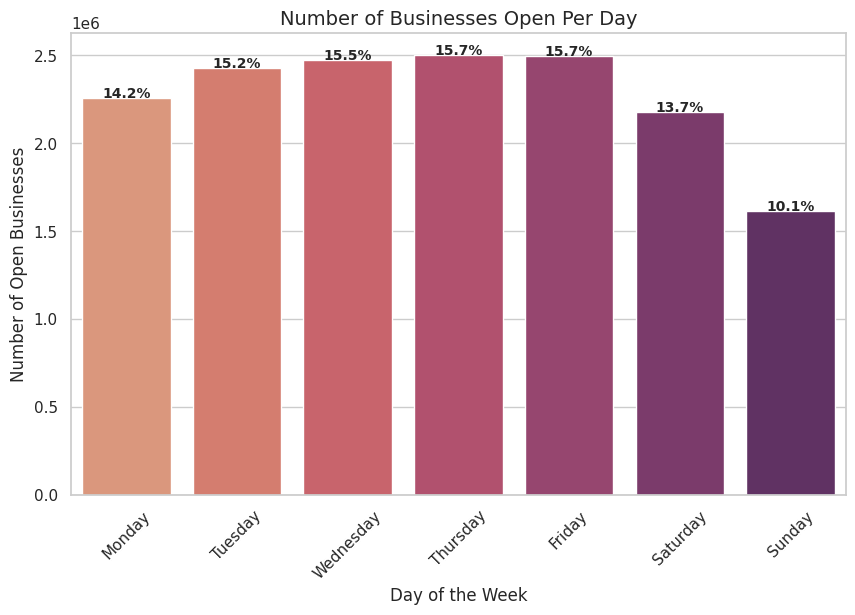

In [54]:
# Visualizing distribution of businesses open across the weekdays

open_counts_pd = open_counts.toPandas()
open_counts_melted = open_counts_pd.melt(var_name="Day", value_name="Open Businesses")
open_counts_melted["Day"] = open_counts_melted["Day"].str.replace("_open", "")

total_businesses = open_counts_melted["Open Businesses"].sum()

open_counts_melted["Percentage"] = (open_counts_melted["Open Businesses"] / total_businesses) * 100

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=open_counts_melted, x="Day", y="Open Businesses", palette='flare')

plt.title("Number of Businesses Open Per Day", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Open Businesses", fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    percentage = open_counts_melted.loc[open_counts_melted["Open Businesses"] == height, "Percentage"].values # open_counts_melted instead of closed_counts_melted
    if len(percentage) > 0:
        ax.text(p.get_x() + p.get_width() / 2, height + 100, f'{percentage[0]:.1f}%', ha="center", fontsize=10, fontweight="bold")

plt.show()

Now, we can visualize which businesses are closed per standard category on each weekday. For that, we can create a heatmap.
We have to be careful about not just showing the number of businesses in each category, as it will create bias towards categories with less businesses. Therefore, we can find percentage of businesses closed in each category.

In [55]:
from pyspark.sql.functions import count, sum, when, col

total_businesses_per_category = df_reviews.groupBy("standard_category").agg(
    count("business_name").alias("total_businesses")
)

closure_by_category = df_reviews.groupBy("standard_category").agg(
    sum(when(col("Monday") == 0, 1).otherwise(0)).alias("Monday_closed"),
    sum(when(col("Tuesday") == 0, 1).otherwise(0)).alias("Tuesday_closed"),
    sum(when(col("Wednesday") == 0, 1).otherwise(0)).alias("Wednesday_closed"),
    sum(when(col("Thursday") == 0, 1).otherwise(0)).alias("Thursday_closed"),
    sum(when(col("Friday") == 0, 1).otherwise(0)).alias("Friday_closed"),
    sum(when(col("Saturday") == 0, 1).otherwise(0)).alias("Saturday_closed"),
    sum(when(col("Sunday") == 0, 1).otherwise(0)).alias("Sunday_closed")
)

closure_by_category = closure_by_category.join(total_businesses_per_category, on="standard_category", how="left")


In [56]:
# Normalizing closure counts by total businesses by calculating percentage
for day in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]:
    closure_by_category = closure_by_category.withColumn(
        f"{day}_closed_pct", (col(f"{day}_closed") / col("total_businesses")) * 100
    )

closure_by_category = closure_by_category.select(
    "standard_category",
    "Monday_closed_pct", "Tuesday_closed_pct", "Wednesday_closed_pct",
    "Thursday_closed_pct", "Friday_closed_pct", "Saturday_closed_pct", "Sunday_closed_pct"
)


In [57]:
closure_by_category_pd = closure_by_category.toPandas()

# Setting 'standard_category' as index for heatmap
closure_by_category_pd.set_index("standard_category", inplace=True)

closure_by_category_pd["Total_Closures"] = closure_by_category_pd.sum(axis=1)
closure_by_category_pd = closure_by_category_pd.sort_values("Total_Closures", ascending=False)
closure_by_category_pd.drop(columns=["Total_Closures"], inplace=True)

closure_by_category_pd = closure_by_category_pd.rename(columns={
    "Monday_closed_pct": "Monday", "Tuesday_closed_pct": "Tuesday",
    "Wednesday_closed_pct": "Wednesday", "Thursday_closed_pct": "Thursday",
    "Friday_closed_pct": "Friday", "Saturday_closed_pct": "Saturday",
    "Sunday_closed_pct": "Sunday"
})

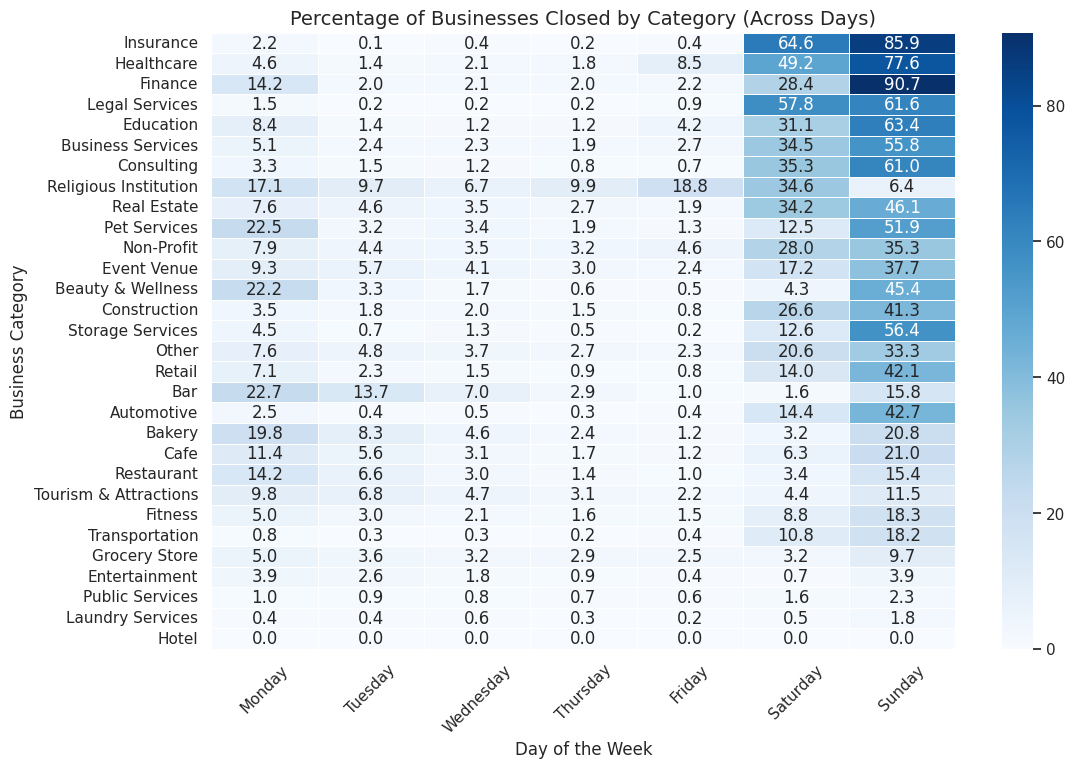

In [58]:
plt.figure(figsize=(12, 8))
sns.heatmap(closure_by_category_pd, cmap="Blues", annot=True, fmt=".1f", linewidths=0.5)

plt.title("Percentage of Businesses Closed by Category (Across Days)", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Business Category", fontsize=12)

plt.xticks(rotation=45)

plt.show()

The above also gives is an idea of how many businesses are open per category on each weekday. That makes this visualization more informative.

### Identify Permanently Closed Businesses

NOTE: We are **defining** permanently closed businesses as the businesses which are closed on all weekdays, i.e., all the columns (from Monday to Sunday) with a value of "0" for that business.

In this section, we will observe the trend of businesses getting closed over time.

In [59]:
# Looking at the minimum and maximum year
from pyspark.sql.functions import max, min

df_reviews.select(min(col('year')), max(col('year'))).show()

+---------+---------+
|min(year)|max(year)|
+---------+---------+
|     1990|     2021|
+---------+---------+



In [60]:
from pyspark.sql.functions import col, sum, when, countDistinct

# Count unique businesses that are closed (0 for all days) per year
closed_trend = df_reviews.groupBy("year").agg(
    countDistinct(
        when(
            (col("Monday") == 0) &
            (col("Tuesday") == 0) &
            (col("Wednesday") == 0) &
            (col("Thursday") == 0) &
            (col("Friday") == 0) &
            (col("Saturday") == 0) &
            (col("Sunday") == 0), col("gmap_id")
        )
    ).alias("num_closed_businesses")
)

closed_trend = closed_trend.orderBy("year")

closed_trend.show()


+----+---------------------+
|year|num_closed_businesses|
+----+---------------------+
|1990|                    0|
|2003|                    0|
|2005|                    0|
|2007|                    0|
|2008|                    0|
|2009|                    0|
|2010|                    0|
|2011|                    0|
|2012|                    3|
|2013|                    1|
|2014|                    3|
|2015|                    5|
|2016|                   23|
|2017|                  124|
|2018|                  288|
|2019|                  615|
|2020|                  729|
|2021|                  784|
+----+---------------------+



One critical thing that we have to consider is the fact that there is an **increase in reviews over time**. Therefore, just observing the number of businesses closed in each year can introduce bias. One solution is to **normalize closure trends**. For that, we can find the percentage of businesses closed per year out of all the businesses.

In [61]:
from pyspark.sql.functions import countDistinct, col, round

total_businesses_per_year = df_reviews.groupBy("year").agg(countDistinct("gmap_id").alias("total_businesses")) # Total no. of businesses per year

closed_trend = closed_trend.join(total_businesses_per_year, on="year", how="left")

closed_trend = closed_trend.withColumn(
    "closure_rate", round((col("num_closed_businesses") / col("total_businesses")) * 100, 2)
)

closed_trend = closed_trend.orderBy("year")

closed_trend.select("year", "num_closed_businesses", "total_businesses", "closure_rate").show()


+----+---------------------+----------------+------------+
|year|num_closed_businesses|total_businesses|closure_rate|
+----+---------------------+----------------+------------+
|1990|                    0|               2|         0.0|
|2003|                    0|               2|         0.0|
|2005|                    0|               1|         0.0|
|2007|                    0|               7|         0.0|
|2008|                    0|              16|         0.0|
|2009|                    0|              29|         0.0|
|2010|                    0|             127|         0.0|
|2011|                    0|             357|         0.0|
|2012|                    3|             889|        0.34|
|2013|                    1|            1696|        0.06|
|2014|                    3|            2272|        0.13|
|2015|                    5|            4372|        0.11|
|2016|                   23|           24791|        0.09|
|2017|                  124|           88158|        0.1

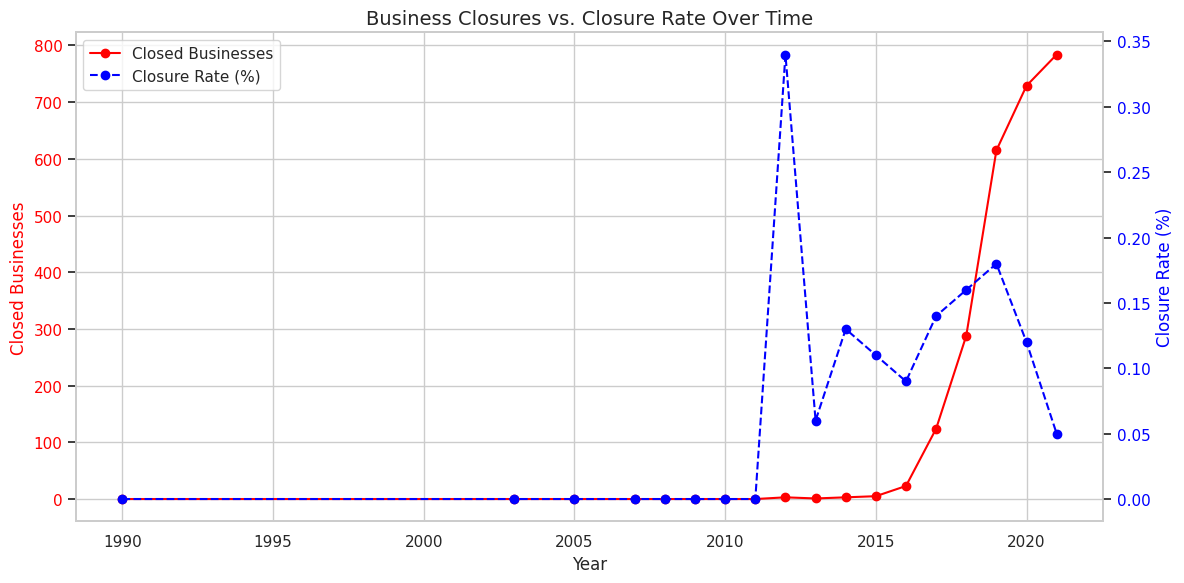

In [62]:
closed_trend_pd = closed_trend.toPandas()

fig, ax1 = plt.subplots(figsize=(12,6))

# First Y-axis: Number of closures
ax1.set_xlabel("Year")
ax1.set_ylabel("Closed Businesses", color="red")
line1, = ax1.plot(closed_trend_pd["year"], closed_trend_pd["num_closed_businesses"], marker="o", color="red", label="Closed Businesses")
ax1.tick_params(axis="y", labelcolor="red")

# Second Y-axis: Closure Rate
ax2 = ax1.twinx()
ax2.set_ylabel("Closure Rate (%)", color="blue")
line2, = ax2.plot(closed_trend_pd["year"], closed_trend_pd["closure_rate"], marker="o", color="blue", linestyle="dashed", label="Closure Rate (%)")
ax2.tick_params(axis="y", labelcolor="blue")

lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left")

plt.title("Business Closures vs. Closure Rate Over Time", fontsize=14)
fig.tight_layout()
plt.grid()

plt.show()



From the above graph, we can see that there is a clear increase in the amount of businesses getting closed, but the actual proportion (percentage) overall decreases over time.

### Understanding Business Reviews Lifespan

By analyzing review lifespan (the period between a business’s first and last recorded review), businesses can gain valuable insights into their longevity, market engagement, and potential sustainability. Aggregating across different regions and categories can help them understand the customer engagement. It can also be hugely beneficial for new businesses about to be opened, as this key metric can help them in resource allocation and planning.

In [63]:
from pyspark.sql.functions import min, max

# First and last recorded review year for each business
business_activity = df_reviews.groupBy("business_name").agg(
    min("year").alias("earliest_year"),
    max("year").alias("latest_year")
)

# Estimated reviews lifespan for a business
business_activity = business_activity.withColumn(
    "business_lifespan",
    col("latest_year") - col("earliest_year")
)

business_activity.show(10)

+--------------------+-------------+-----------+-----------------+
|       business_name|earliest_year|latest_year|business_lifespan|
+--------------------+-------------+-----------+-----------------+
|Windy City Hand C...|         2020|       2020|                0|
|Joe's pizza and p...|         2020|       2020|                0|
|Mon-Clair Animal ...|         2021|       2021|                0|
| Cat & Fiddle Tavern|         2021|       2021|                0|
|Applebee's Grill ...|         2016|       2021|                5|
|Sullivan's Antiqu...|         2021|       2021|                0|
|             Rally's|         2016|       2021|                5|
|         Handee Mart|         2020|       2021|                1|
|JB Hawks Discount...|         2019|       2021|                2|
|   T & D Sweet Water|         2018|       2018|                0|
+--------------------+-------------+-----------+-----------------+
only showing top 10 rows



In [64]:
# Filtering permanently closed businesses based on all days being closed
permanently_closed_businesses = df_reviews.filter(
    (col("Monday") == 0) &
    (col("Tuesday") == 0) &
    (col("Wednesday") == 0) &
    (col("Thursday") == 0) &
    (col("Friday") == 0) &
    (col("Saturday") == 0) &
    (col("Sunday") == 0)
).select("business_name").distinct()

permanently_closed_lifespan = business_activity.join(
    permanently_closed_businesses, on="business_name", how="inner"
)

permanently_closed_lifespan = permanently_closed_lifespan.join(
    df_reviews.select("business_name", "region", "standard_category").distinct(), on="business_name", how="left"
)

permanently_closed_lifespan.show(10)


+--------------------+-------------+-----------+-----------------+---------+-----------------+
|       business_name|earliest_year|latest_year|business_lifespan|   region|standard_category|
+--------------------+-------------+-----------+-----------------+---------+-----------------+
|Applebee's Grill ...|         2016|       2021|                5|Southwest|       Restaurant|
|Applebee's Grill ...|         2016|       2021|                5|  Midwest|       Restaurant|
|Applebee's Grill ...|         2016|       2021|                5|Northeast|       Restaurant|
|Applebee's Grill ...|         2016|       2021|                5|Southeast|       Restaurant|
|Applebee's Grill ...|         2016|       2021|                5|     West|       Restaurant|
|              Arhaus|         2016|       2021|                5|  Midwest|           Retail|
|              Arhaus|         2016|       2021|                5|Southeast|           Retail|
|              Arhaus|         2016|       2021|  

In [65]:
from pyspark.sql.functions import avg

# Removing duplicates
unique_businesses = permanently_closed_lifespan.select("business_name", "business_lifespan", "region", "standard_category").distinct()

unique_businesses.show(10)


+--------------------+-----------------+---------+-----------------+
|       business_name|business_lifespan|   region|standard_category|
+--------------------+-----------------+---------+-----------------+
|13th Floor Haunte...|                1|  Midwest|      Real Estate|
|13th Floor Haunte...|                1|Southeast|      Real Estate|
|13th Floor Haunte...|                1|Southwest|      Real Estate|
|13th Floor Haunte...|                1|     West|      Real Estate|
|13th Floor Haunte...|                1|Southwest|      Event Venue|
|1846 Tavern & Res...|                0|Northeast|       Restaurant|
|             21 Club|                0|Northeast|       Restaurant|
|        9th Ave Pier|                0|Northeast|              Bar|
|AAA Farmington Hills|                0|  Midwest|        Insurance|
|         AAA Suffolk|                0|Northeast|        Insurance|
+--------------------+-----------------+---------+-----------------+
only showing top 10 rows



In [66]:
# Average lifespan per region
business_lifespan_by_region = unique_businesses.groupBy("region").agg(
    round(avg("business_lifespan"), 2).alias("avg_lifespan")
).orderBy(col("avg_lifespan").desc())

business_lifespan_by_region.show()

+---------+------------+
|   region|avg_lifespan|
+---------+------------+
|Southwest|        4.63|
|Southeast|        3.92|
|  Midwest|        3.72|
|Northeast|        3.63|
|     West|        3.34|
+---------+------------+



In [67]:
# Average lifespan per standard category
business_lifespan_by_category = unique_businesses.groupBy("standard_category").agg(
    round(avg("business_lifespan"), 2).alias("avg_lifespan")
).orderBy(col("avg_lifespan").desc())

business_lifespan_by_category.show(10)

+-----------------+------------+
|standard_category|avg_lifespan|
+-----------------+------------+
|          Finance|        6.32|
|       Consulting|         6.0|
|       Automotive|        5.06|
|   Transportation|         5.0|
|Business Services|         4.8|
|       Non-Profit|        4.67|
|           Bakery|        4.43|
|            Other|        4.37|
|       Restaurant|        4.08|
|Beauty & Wellness|        3.95|
+-----------------+------------+
only showing top 10 rows



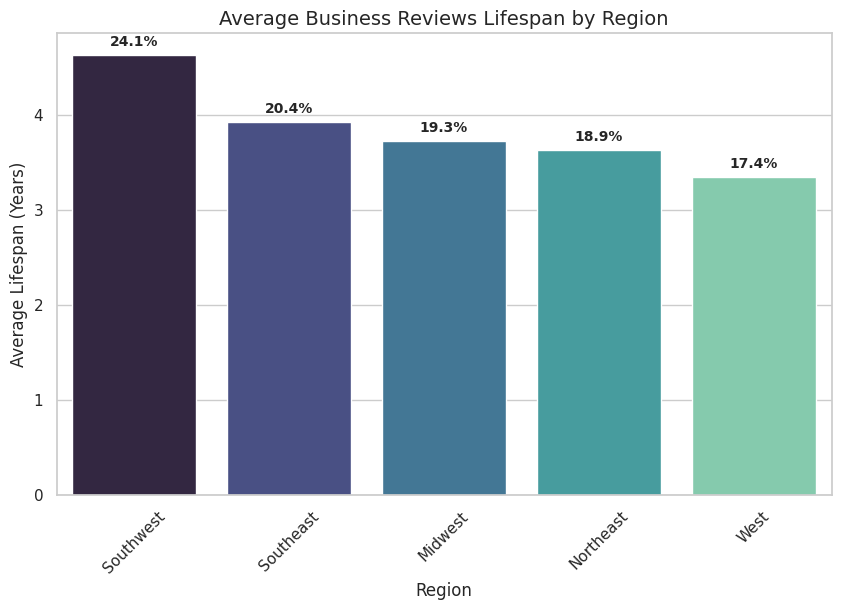

In [68]:
# Region
business_lifespan_region_pd = business_lifespan_by_region.toPandas()

business_lifespan_region_pd["percentage"] = (business_lifespan_region_pd["avg_lifespan"] /
                                             business_lifespan_region_pd["avg_lifespan"].sum()) * 100

plt.figure(figsize=(10,6))
ax = sns.barplot(data=business_lifespan_region_pd, x="region", y="avg_lifespan", hue="region", palette="mako")

for p, perc in zip(ax.patches, business_lifespan_region_pd["percentage"]):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{perc:.1f}%',
            ha="center", fontsize=10, fontweight="bold")

plt.title("Average Business Reviews Lifespan by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Lifespan (Years)", fontsize=12)
plt.xticks(rotation=45)

plt.show()


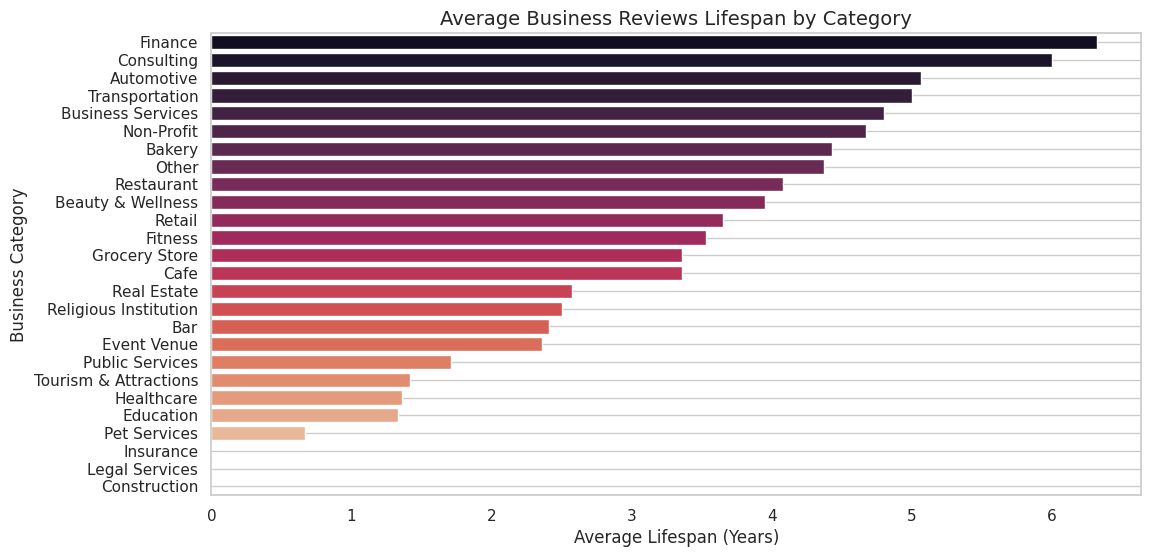

In [69]:
# Category
business_lifespan_category_pd = business_lifespan_by_category.toPandas()

plt.figure(figsize=(12,6))
sns.barplot(data=business_lifespan_category_pd, x="avg_lifespan", y="standard_category", hue = "standard_category", palette="rocket")

plt.title("Average Business Reviews Lifespan by Category", fontsize=14)
plt.xlabel("Average Lifespan (Years)", fontsize=12)
plt.ylabel("Business Category", fontsize=12)
plt.grid()

plt.show()

Looking at the top business categories in our dataset

In [70]:
df_reviews.groupBy("standard_category").count().orderBy(col("count").desc()).show(4, truncate=False)

+-----------------+------+
|standard_category|count |
+-----------------+------+
|Retail           |785347|
|Restaurant       |714065|
|Beauty & Wellness|170592|
|Automotive       |163933|
+-----------------+------+
only showing top 4 rows



### Word cloud for the top 4 categories - Retail, Restaurant, Beauty and Wellness, Automotive


First installing the required libraries for text processing and word cloud vizualization in pandas

In [71]:
!pip install wordcloud matplotlib pandas nltk

Extracting text data from review column for Word Cloud

In [72]:
df_retail = df_reviews.filter(df_reviews["standard_category"] == "Retail").select("standard_category", "reviews")
df_restaurant = df_reviews.filter(df_reviews["standard_category"] == "Restaurant").select("standard_category", "reviews")
df_beauty = df_reviews.filter(df_reviews["standard_category"] == "Beauty & Wellness").select("standard_category", "reviews")
df_automotive = df_reviews.filter(df_reviews["standard_category"] == "Automotive").select("standard_category", "reviews")

df_retail_pandas = df_retail.toPandas()
df_restaurant_pandas = df_restaurant.toPandas()
df_beauty_pandas = df_beauty.toPandas()
df_automotive_pandas = df_automotive.toPandas()

Combining all text data into a single string for word cloud processing.

In [73]:
retail_text = " ".join(df_retail_pandas["reviews"].dropna().astype(str))
restaurant_text = " ".join(df_restaurant_pandas["reviews"].dropna().astype(str))
beauty_text = " ".join(df_beauty_pandas["reviews"].dropna().astype(str))
automotive_text = " ".join(df_automotive_pandas["reviews"].dropna().astype(str))

Preprocessing the text data before generating the word cloud to ensure only meaningful words are used-

--- Removing stopwords (e.g., "the", "and", "of").


--- Lowercasing all words.

--- Removing special characters and numbers.






In [74]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

cleaned_text_retail = clean_text(retail_text)
cleaned_text_restaurant = clean_text(restaurant_text)
cleaned_text_beauty = clean_text(beauty_text)
cleaned_text_automotive = clean_text(automotive_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Word Cloud for Reviews from Retail Businesses

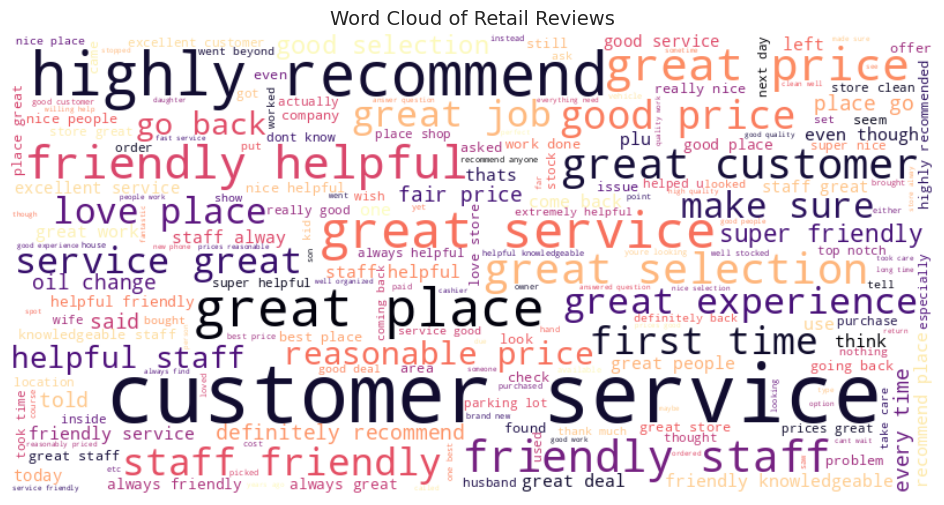

In [75]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="magma", random_state=42).generate(cleaned_text_retail)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Word Cloud of Retail Reviews", fontsize=14)
plt.show()

### Word Cloud for Reviews from Restaurant Businesses

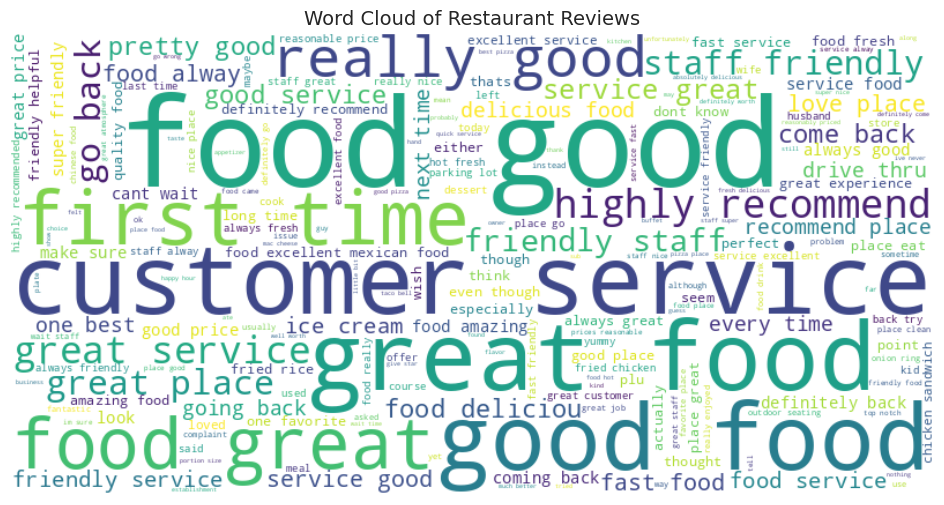

In [76]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis", random_state=42).generate(cleaned_text_restaurant)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Word Cloud of Restaurant Reviews", fontsize=14)
plt.show()

### Word Cloud for Reviews from Beauty and Wellness Businesses

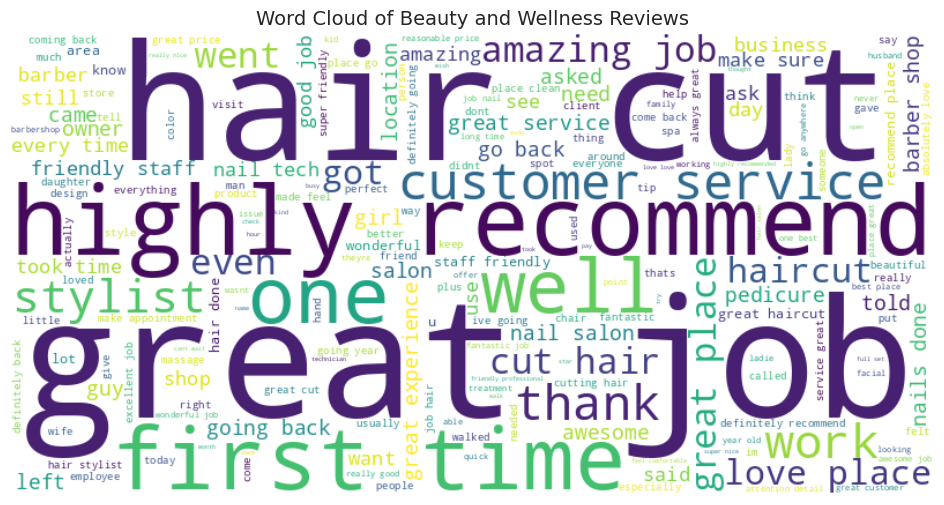

In [77]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white", random_state =42).generate(cleaned_text_beauty)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Word Cloud of Beauty and Wellness Reviews", fontsize=14)
plt.show()

### Word Cloud for Reviews from Automotive Businesses

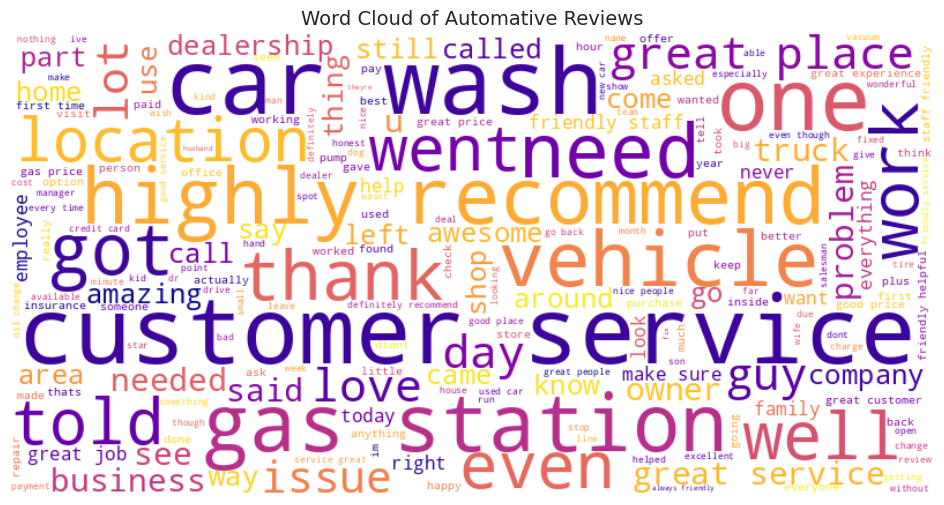

In [78]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="plasma", random_state=42).generate(cleaned_text_automotive)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Automative Reviews", fontsize=14)
plt.show()

## Geopandas

### Creating a pandas dataframe to plot location of businesses by density on US map

In [79]:
from pyspark.sql import functions as F

bin_size = 0.5
df_reviews_filtered = df_reviews.filter(
    (df_reviews["longitude"] >= -125) & (df_reviews["longitude"] <= -65) &
    (df_reviews["latitude"] >= 25) & (df_reviews["latitude"] <= 50)
)

bin_size = 0.5
df_reviews_binned = df_reviews_filtered.withColumn(
    "lat_bin", (F.col("latitude") / bin_size).cast("int") * bin_size
).withColumn(
    "lon_bin", (F.col("longitude") / bin_size).cast("int") * bin_size
)

df_density = df_reviews_binned.groupBy("lat_bin", "lon_bin").agg(F.count("*").alias("business_count"))
df_density_pd = df_density.toPandas()


df_density_pd = df_density.toPandas()

### KDE Density plot showing hotspots of businesses highlighting major metropolitan cities

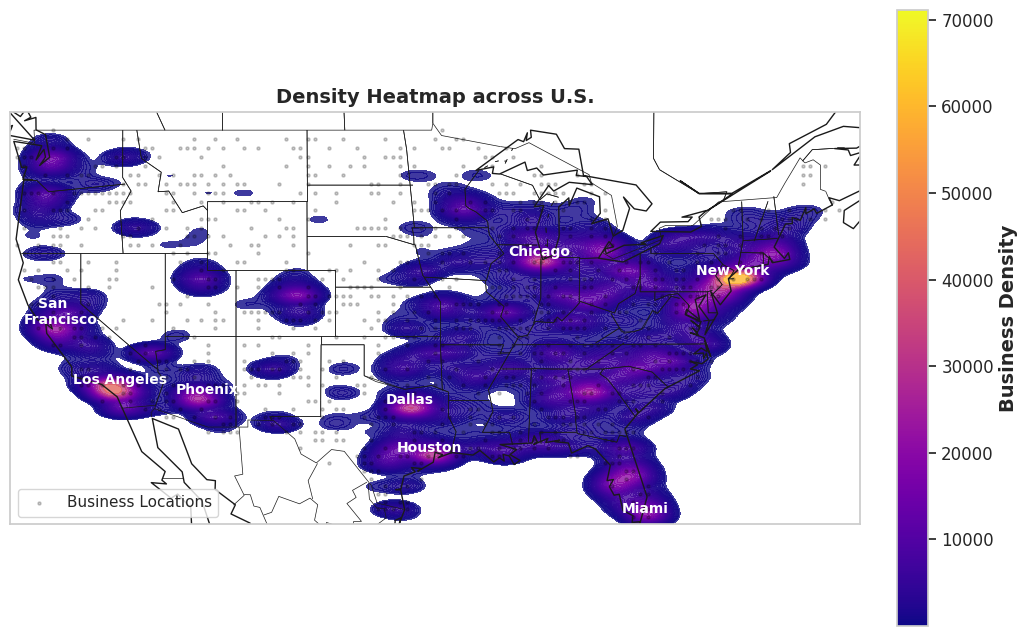

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import numpy as np

fig, ax = plt.subplots(figsize=(12, 8))

m = Basemap(projection="mill", llcrnrlat=25, urcrnrlat=50, llcrnrlon=-125, urcrnrlon=-65, ax=ax)
m.drawcoastlines()
m.drawcountries()
m.drawstates()

x, y = m(df_density_pd["lon_bin"].values, df_density_pd["lat_bin"].values)

kde = sns.kdeplot(
    x=x, y=y,
    weights=df_density_pd["business_count"],
    fill=True, cmap="plasma", alpha=0.8, bw_adjust=0.15, levels=50, ax=ax
)

norm = plt.Normalize(df_density_pd["business_count"].min(), df_density_pd["business_count"].max())  # Normalize color scale
sm = plt.cm.ScalarMappable(cmap="plasma", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)
cbar.set_label("Business Density", fontsize=14, fontweight="bold")
cbar.ax.tick_params(labelsize=12)

sample_indices = np.random.choice(len(x), size=int(0.3 * len(x)), replace=False)
x_sampled, y_sampled = x[sample_indices], y[sample_indices]

m.scatter(x_sampled, y_sampled, s=5, color="black", alpha=0.2, label="Business Locations")

city_coords = {
    "New York": (-74.006, 40.7128),
    "Los Angeles": (-117.2437, 34.0522),
    "Chicago": (-87.6298, 41.8781),
    "Houston": (-95.3698, 29.7604),
    "Phoenix": (-111.074, 33.4484),
    "San" :  (-122, 38.7749),
    "Francisco": (-121.4194, 37.7749),
    "Dallas": (-96.7970, 32.7767),
    "Miami": (-80.1918, 25.7617)
}

for city, (lon, lat) in city_coords.items():
    x_city, y_city = m(lon, lat)
    ax.text(x_city, y_city, city, fontsize=10, color="white", fontweight="bold", ha="center")

plt.legend(loc="lower left")
plt.title("Density Heatmap across U.S.", fontsize=14, fontweight="bold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


### Creating another pandas dataframe with average ratings for each state to plot on a U.S. Map

In [81]:
from pyspark.sql.functions import col, avg

df_state_avg_ratings = df_reviews.groupBy("state").agg(
    avg("rating").alias("avg_rating")
)

df_state_avg_ratings = df_state_avg_ratings.orderBy(col("avg_rating").desc())

df_state_avg_ratings.show(truncate=False)



+-------------+------------------+
|state        |avg_rating        |
+-------------+------------------+
|Maine        |4.519236883942766 |
|Vermont      |4.496023856858847 |
|Hawaii       |4.491806091806092 |
|Idaho        |4.473037696512087 |
|Montana      |4.468532118620433 |
|New_Hampshire|4.468490624039348 |
|South_Dakota |4.462187197566708 |
|Wyoming      |4.45979492714517  |
|Oregon       |4.456293668938698 |
|Rhode_Island |4.445190156599552 |
|Wisconsin    |4.432339143369313 |
|Massachusetts|4.425422156961242 |
|Pennsylvania |4.4235256203673865|
|Washington   |4.422711487706626 |
|Nebraska     |4.421379814724524 |
|Utah         |4.420225177925563 |
|Iowa         |4.418877354863514 |
|Alaska       |4.418379883692358 |
|Minnesota    |4.415662386607652 |
|North_Dakota |4.4153132250580045|
+-------------+------------------+
only showing top 20 rows



In [82]:
df_state_avg_ratings_pd = df_state_avg_ratings.toPandas()

df_state_avg_ratings_pd["state"] = df_state_avg_ratings_pd["state"].str.replace("_", " ").str.lower()


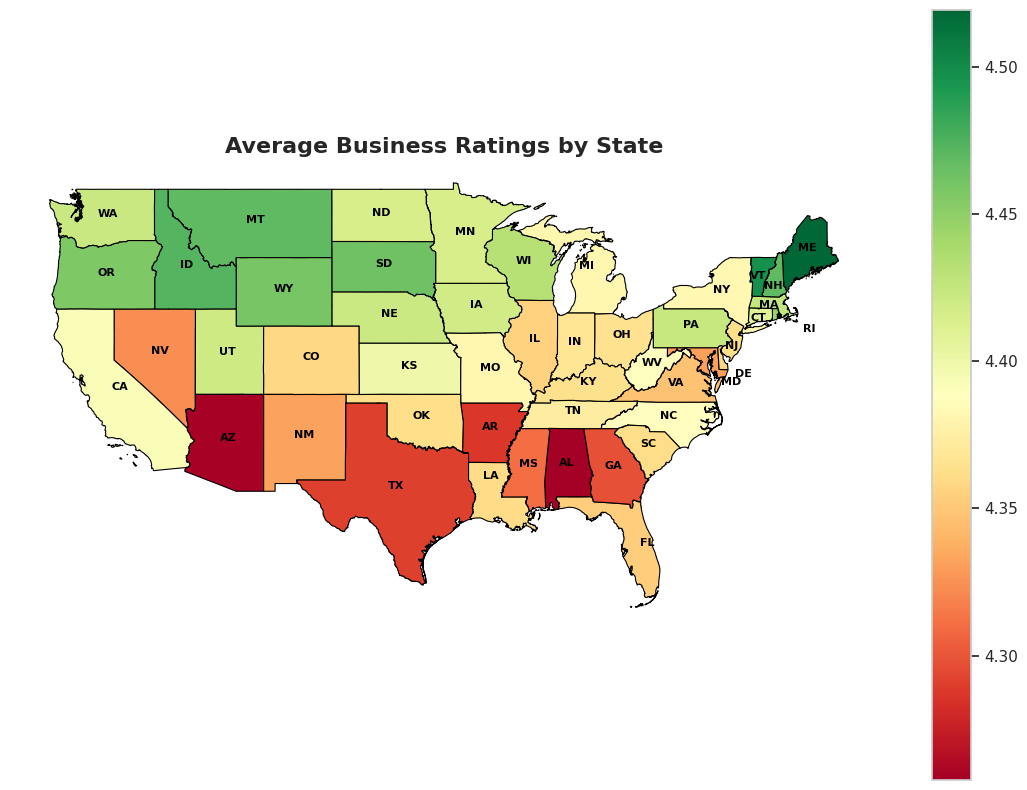

In [83]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf_states = gpd.read_file("https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json")
gdf_states = gdf_states.to_crs(epsg=2163)  # Convert to projected CRS

gdf_states["NAME"] = gdf_states["NAME"].str.lower()

gdf_merged = gdf_states.merge(df_state_avg_ratings_pd, left_on="NAME", right_on="state")

gdf_merged = gdf_merged[~gdf_merged["NAME"].isin(["hawaii", "alaska"])]

state_abbreviations = {
    "alabama": "AL", "alaska": "AK", "arizona": "AZ", "arkansas": "AR", "california": "CA", "colorado": "CO",
    "connecticut": "CT", "delaware": "DE", "florida": "FL", "georgia": "GA", "hawaii": "HI", "idaho": "ID",
    "illinois": "IL", "indiana": "IN", "iowa": "IA", "kansas": "KS", "kentucky": "KY", "louisiana": "LA",
    "maine": "ME", "maryland": "MD", "massachusetts": "MA", "michigan": "MI", "minnesota": "MN",
    "mississippi": "MS", "missouri": "MO", "montana": "MT", "nebraska": "NE", "nevada": "NV", "new hampshire": "NH",
    "new jersey": "NJ", "new mexico": "NM", "new york": "NY", "north carolina": "NC", "north dakota": "ND",
    "ohio": "OH", "oklahoma": "OK", "oregon": "OR", "pennsylvania": "PA", "rhode island": "RI", "south carolina": "SC",
    "south dakota": "SD", "tennessee": "TN", "texas": "TX", "utah": "UT", "vermont": "VT", "virginia": "VA",
    "washington": "WA", "west virginia": "WV", "wisconsin": "WI", "wyoming": "WY"
}

gdf_merged["state_abbr"] = gdf_merged["NAME"].map(state_abbreviations)

gdf_merged["centroid"] = gdf_merged.geometry.centroid

gdf_merged = gdf_merged.to_crs(epsg=4326)
gdf_merged["x"] = gdf_merged.centroid.x
gdf_merged["y"] = gdf_merged.centroid.y

northeast_states = {
    "connecticut": (-0.7, -0.3), "rhode island": (2, -1), "massachusetts": (-1, -0.2), "louisiana": (-1, 1), "maryland": (1.2, -1.5),
    "new jersey": (-0.6, -0.5), "delaware": (1, -1), "vermont": (-0.8, -0.3), "new hampshire": (-0.8, -0.5), "florida": (1, -0.5)
}

fig, ax = plt.subplots(figsize=(14, 10))
gdf_merged.plot(column="avg_rating", cmap="RdYlGn", linewidth=0.8, edgecolor="black", legend=True, ax=ax)

for idx, row in gdf_merged.iterrows():
    if row["NAME"] in northeast_states:
        x_offset, y_offset = northeast_states[row["NAME"]]
        plt.text(row["x"] + x_offset, row["y"] + y_offset, row["state_abbr"],
                 fontsize=8, color="black", ha="left", fontweight="bold")
    else:
        plt.text(row["x"], row["y"], row["state_abbr"],
                 fontsize=8, color="black", ha="center", fontweight="bold")

plt.title("Average Business Ratings by State", fontsize=16, fontweight="bold")
plt.axis("off")

plt.show()


### Analyzing the relationship between Average rating and Number of Reviews for each business by Region

In [84]:
from pyspark.sql import functions as F

#Computing average rating per business, total reviews, and region
df_business_avg_ratings = df_reviews.groupBy("business_name", "region", "standard_category").agg(
    F.avg("rating").alias("avg_rating"),
    F.sum("num_of_reviews").alias("total_reviews")
)
df_business_avg_ratings.show(5)
df_business_avg_ratings = df_business_avg_ratings.toPandas()


+--------------------+-------+-----------------+----------+-------------+
|       business_name| region|standard_category|avg_rating|total_reviews|
+--------------------+-------+-----------------+----------+-------------+
|Channel Distribution|Midwest|Business Services|       3.0|           87|
|Peerless-Premier ...|Midwest|           Retail|       5.0|           26|
|       League Lounge|Midwest|              Bar|       5.0|          105|
|Gad's Grocery & L...|Midwest|           Retail|       5.0|           48|
|VanMeters Drive A...|Midwest|           Retail|       5.0|           18|
+--------------------+-------+-----------------+----------+-------------+
only showing top 5 rows



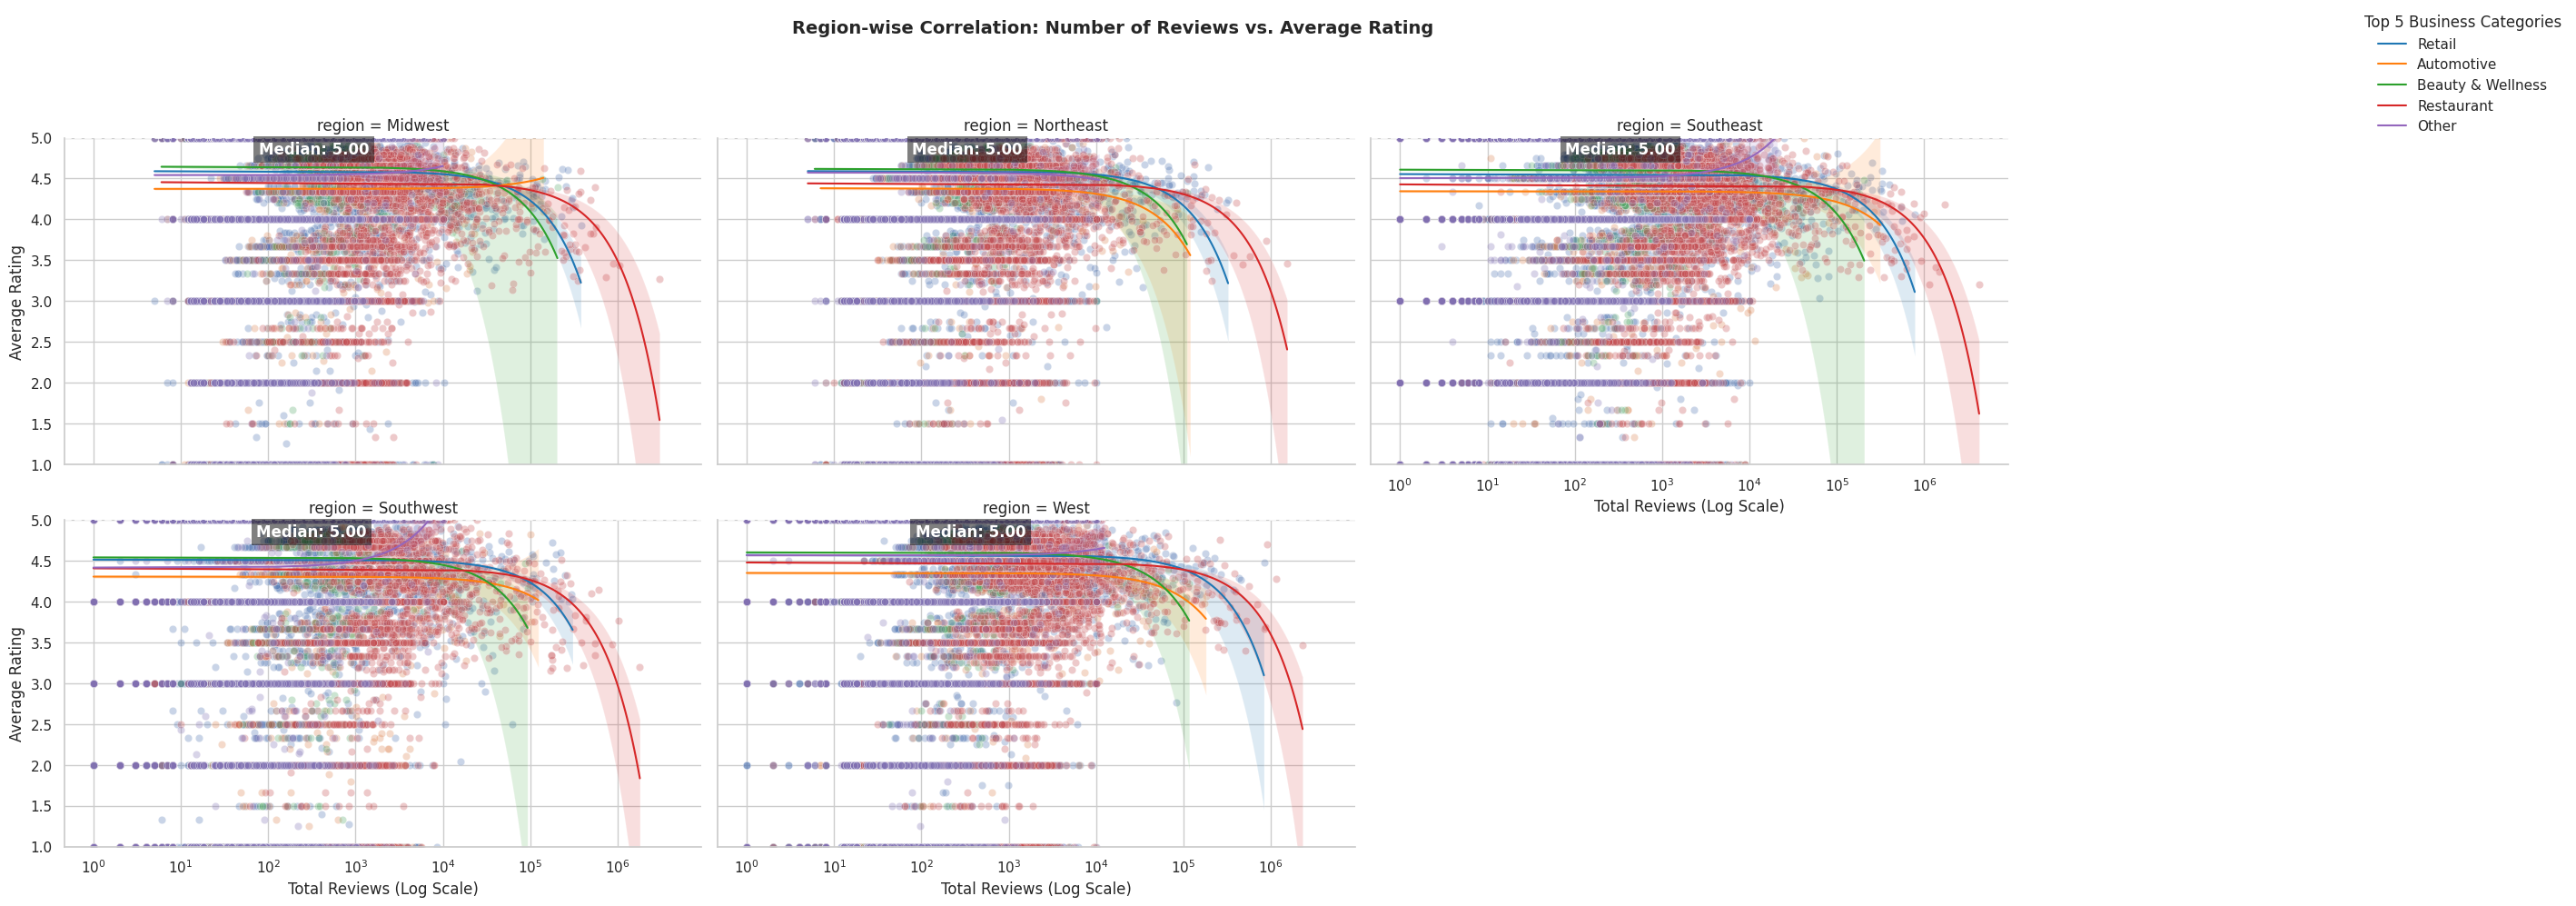

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

top_categories = df_business_avg_ratings["standard_category"].value_counts().nlargest(5).index
df_filtered = df_business_avg_ratings[df_business_avg_ratings["standard_category"].isin(top_categories)]

g = sns.FacetGrid(df_filtered, col="region", hue="standard_category", col_wrap=3, height=5, aspect=1.5, palette="tab10")

def scatter_with_trend(data, color, **kwargs):
    sns.scatterplot(data=data, x="total_reviews", y="avg_rating", alpha=0.3, **kwargs)
    sns.regplot(data=data, x="total_reviews", y="avg_rating", scatter=False,
                color=color, order=1, line_kws={"linewidth": 1.5}, **kwargs)

g.map_dataframe(scatter_with_trend)

for ax in g.axes.flat:
    ax.set_xscale("log")
    ax.set_ylim(1, 5)

for ax, region in zip(g.axes.flat, df_filtered["region"].unique()):
    median_rating = df_filtered[df_filtered["region"] == region]["avg_rating"].median()
    x_position = df_filtered[df_filtered["region"] == region]["total_reviews"].median()

    ax.axhline(median_rating, linestyle="--", color="white", alpha=0.8, linewidth=1.5)
    ax.text(x_position, median_rating - 0.2, f"Median: {median_rating:.2f}",
            color="white", fontsize=12, fontweight="bold", bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))

g.fig.suptitle("Region-wise Correlation: Number of Reviews vs. Average Rating", fontsize=14, fontweight="bold")
plt.subplots_adjust(top=0.85)
g.set_axis_labels("Total Reviews (Log Scale)", "Average Rating")

handles, labels = g.axes.flat[0].get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
g.add_legend(title="Top 5 Business Categories",
             handles=list(unique_labels.values()), labels=list(unique_labels.keys()), bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


We can see the distribution of businesses through the scatter plot for each region and observe a similar trend in each region, due to that reason we decided to focus only on dominant region (Southeast) for further analysis. Other than that we can see that the median rating for each state is 5.00, pointing towards the positive bias in our ratings.


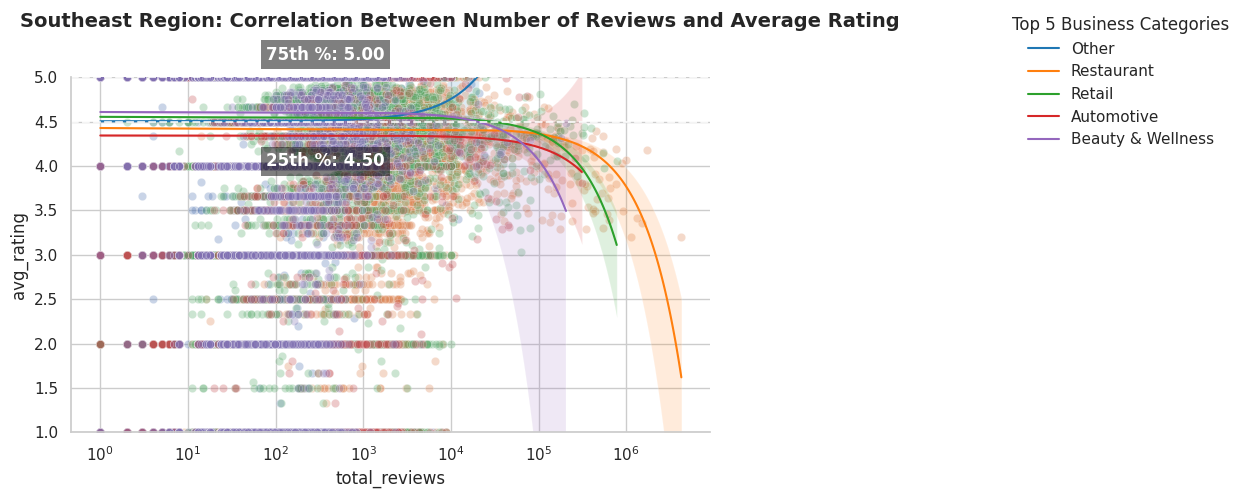

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_southeast = df_business_avg_ratings[df_business_avg_ratings["region"] == "Southeast"]

top_categories = df_southeast["standard_category"].value_counts().nlargest(5).index
df_southeast_filtered = df_southeast[df_southeast["standard_category"].isin(top_categories)]

g = sns.FacetGrid(df_southeast_filtered, hue="standard_category", height=5, aspect=1.5, palette="tab10")

def scatter_with_trend(data, color, **kwargs):
    sns.scatterplot(data=data, x="total_reviews", y="avg_rating", alpha=0.3, **kwargs)
    sns.regplot(data=data, x="total_reviews", y="avg_rating", scatter=False,
                color=color, order=1, line_kws={"linewidth": 1.5}, **kwargs)

g.map_dataframe(scatter_with_trend)

g.ax.set_xscale("log")
g.ax.set_ylim(1, 5)

median_rating = df_southeast_filtered["avg_rating"].median(skipna=True)

x_position = df_southeast_filtered["total_reviews"].median(skipna=True)

q1 = df_southeast_filtered["avg_rating"].quantile(0.25)  # 25th percentile
q3 = df_southeast_filtered["avg_rating"].quantile(0.75)  # 75th percentile

g.ax.axhline(q1, linestyle="--", color="white", alpha=0.8, linewidth=1.5)
g.ax.axhline(q3, linestyle="--", color="white", alpha=0.8, linewidth=1.5)

x_position = df_southeast_filtered["total_reviews"].median(skipna=True)

g.ax.text(x_position, q1 - 0.5, f"25th %: {q1:.2f}",
          color="white", fontsize=12, fontweight="bold", bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))

g.ax.text(x_position, q3 + 0.2, f"75th %: {q3:.2f}",
          color="white", fontsize=12, fontweight="bold", bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))


g.fig.suptitle("Southeast Region: Correlation Between Number of Reviews and Average Rating", fontsize=14, fontweight="bold")

plt.subplots_adjust(top=0.85)

handles, labels = g.ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
g.add_legend(title="Top 5 Business Categories",
             handles=list(unique_labels.values()), labels=list(unique_labels.keys()), bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

 The scatter plot and trend lines show that businesses with fewer reviews tend to have a wider spread of ratings, however as number of reviews increases, average ratings tend to stabilize around 4.0-4.5 but at very high review counts, they slightly decrease, as shown by the trend lines. This signifies that larger or more popular businesses with more reviews don’t necessarily mean a higher rating.

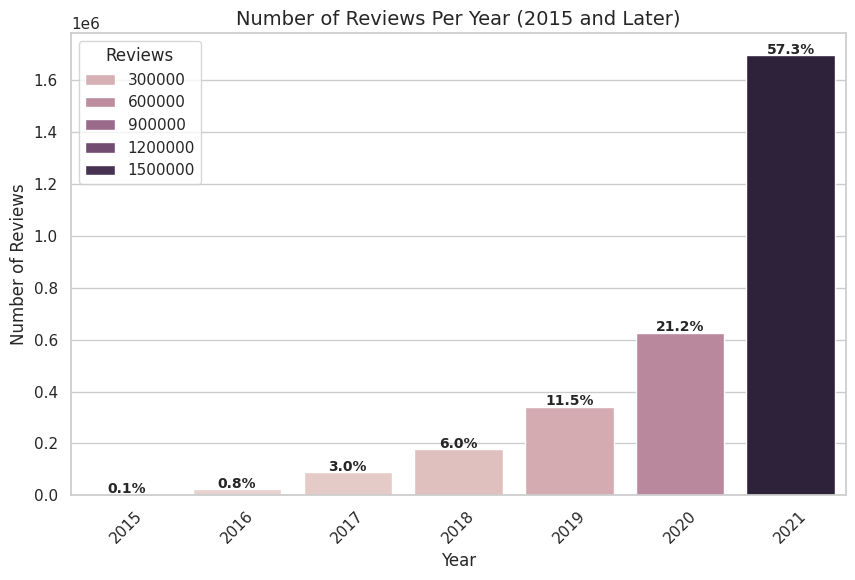

In [87]:
df_time = df_reviews.select("year", "month", "week").toPandas()

df_time = df_time[df_time["year"] >= 2015]

year_counts = df_time["year"].value_counts().reset_index()
year_counts.columns = ["Year", "Reviews"]
year_counts["Percentage"] = (year_counts["Reviews"] / year_counts["Reviews"].sum()) * 100

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=year_counts, x="Year", y="Reviews", hue="Reviews")
plt.title("Number of Reviews Per Year (2015 and Later)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    percentage = year_counts.loc[year_counts["Reviews"] == height, "Percentage"].values
    if len(percentage) > 0:
        ax.text(p.get_x() + p.get_width() / 2, height + 5000, f'{percentage[0]:.1f}%',
                ha="center", fontsize=10, fontweight="bold")

plt.show()

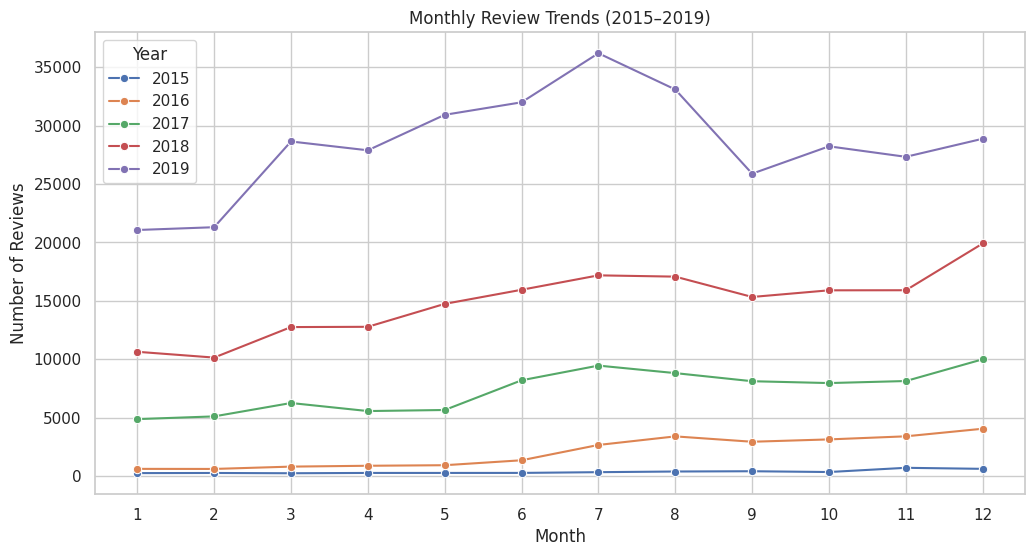

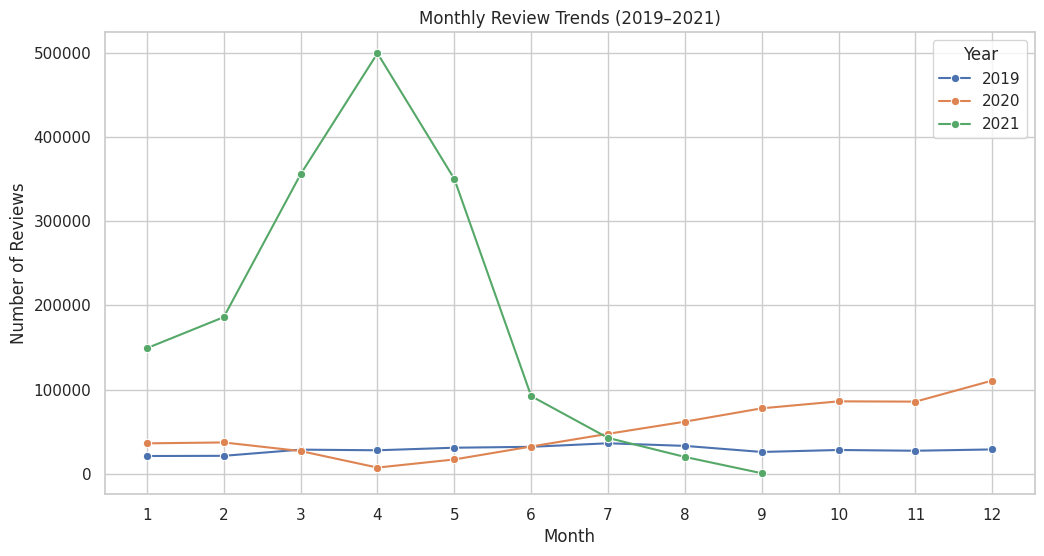

In [88]:
df_time = df_reviews.select("year", "month").toPandas()

monthly_counts_2015_2019 = df_time[(df_time['year'] >= 2015) & (df_time['year'] <= 2019)]
monthly_counts_2015_2019 = (
    monthly_counts_2015_2019.groupby(["year", "month"]).size().reset_index(name="Reviews")
)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

for year in range(2015, 2020):
    year_data = monthly_counts_2015_2019[monthly_counts_2015_2019["year"] == year]
    sns.lineplot(data=year_data, x="month", y="Reviews", label=str(year), marker="o")

plt.title("Monthly Review Trends (2015–2019)")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.xticks(range(1, 13))
plt.legend(title="Year")
plt.show()

# Second plot one
monthly_counts_2019_2021 = df_time[df_time["year"].isin([2019, 2020, 2021])]
monthly_counts_2019_2021 = (
    monthly_counts_2019_2021.groupby(["year", "month"]).size().reset_index(name="Reviews")
)

plt.figure(figsize=(12, 6))
for year in range(2019, 2022):
    year_data = monthly_counts_2019_2021[monthly_counts_2019_2021["year"] == year]
    sns.lineplot(data=year_data, x="month", y="Reviews", label=str(year), marker="o")

plt.title("Monthly Review Trends (2019–2021)")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.xticks(range(1, 13))
plt.legend(title="Year")

plt.show()

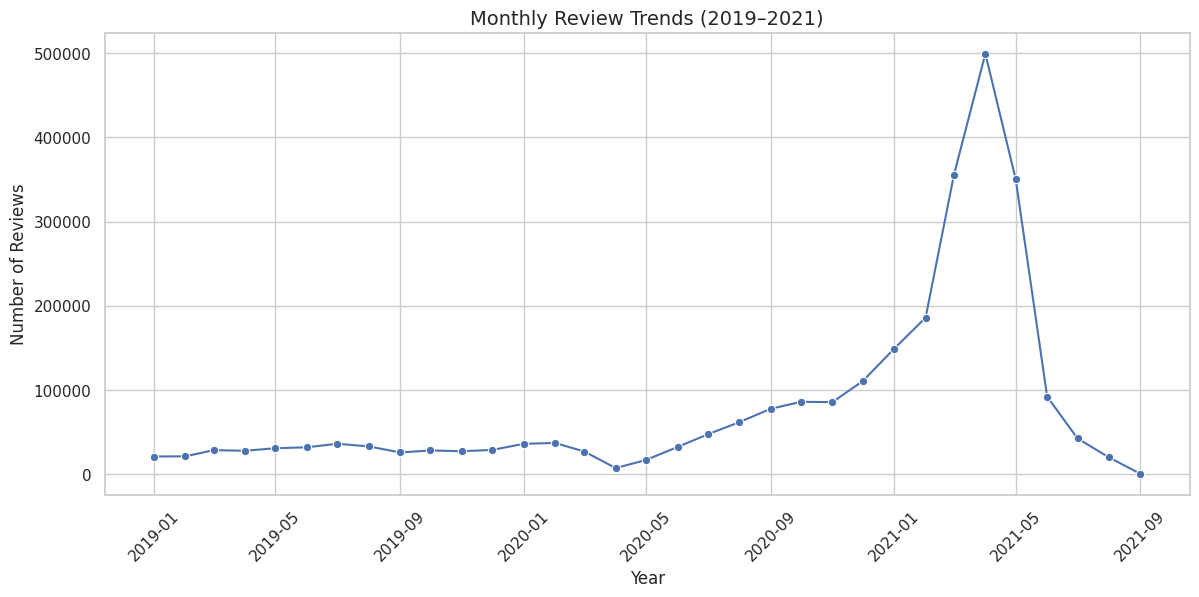

In [89]:
df_time = df_reviews.select("year", "month").toPandas()

df_time = df_time[(df_time["year"] >= 2019) & (df_time["year"] <= 2021)]

df_time["date"] = pd.to_datetime(df_time["year"].astype(str) + "-" + df_time["month"].astype(str) + "-01")

monthly_counts = df_time.groupby("date").size().reset_index(name="Reviews")

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.lineplot(data=monthly_counts, x="date", y="Reviews", marker="o", color="b")

plt.title("Monthly Review Trends (2019–2021)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=45)

plt.show()

The below figure shows that the distribution is right skewed with a peak at around a character count of 100. This means that a majority of the reviews fall under this length and the outliers, which are causing the skew, fall under a 1000+ character count. From this, we know that customers typically leave a short and simple review, with an exception of a few outliers which leave character counts of more than 1000.

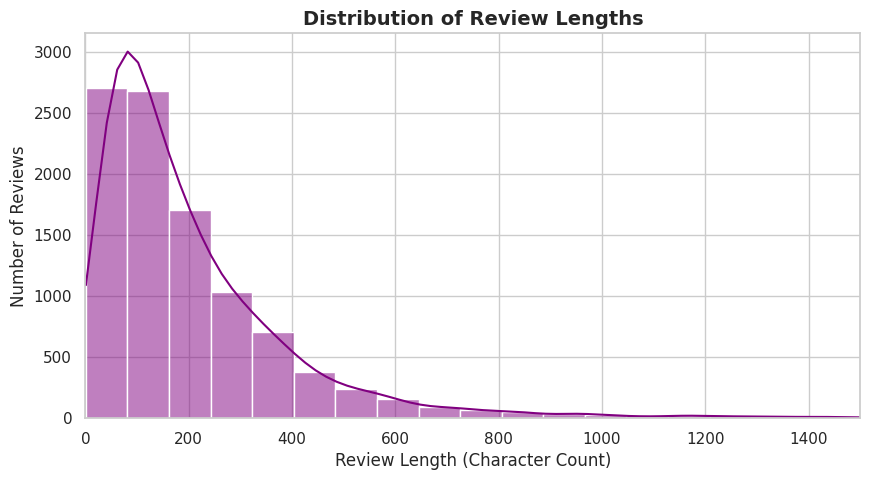

In [90]:
# importing the necessary to make the visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_reviews_pandas = df_reviews.select("reviews").limit(10000).toPandas()

df_reviews_pandas["reviews"] = df_reviews_pandas["reviews"].fillna("").astype(str) # filling in the null values to not skew the data

df_reviews_pandas["review_length"] = df_reviews_pandas["reviews"].apply(len) # applying a trendline over the data to show distribution shape

plt.figure(figsize=(10, 5))
sns.histplot(df_reviews_pandas["review_length"], bins=50, kde=True, color='purple')
plt.xlim(0, 1500)  # Setting x-axis limit to account for outliers that skew the data
plt.xlabel('Review Length (Character Count)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12) #using the y axis to show the number of reviews for each character count
plt.title('Distribution of Review Lengths', fontsize=14, fontweight='bold')
plt.show()

The figure below is a comparative box plot visualization in which it can be seen that lower rating columns 1 and 2 have a higher maximum review length rating and higher descriptive statistics such as interquartile range, median, mean, and 25th and 75th percentiles. This information shows how on average, the negative ratings tend to be longer in length compared to their higher rated counterparts. Although there are outliers for each of the categories, each column has an equal number of outliers to show that the distributions still vary  for each rating. If a business has numerous ratings which are on the longer side of the character count, we can infer that those are typically lower rated ratings such as a 1 or 2.


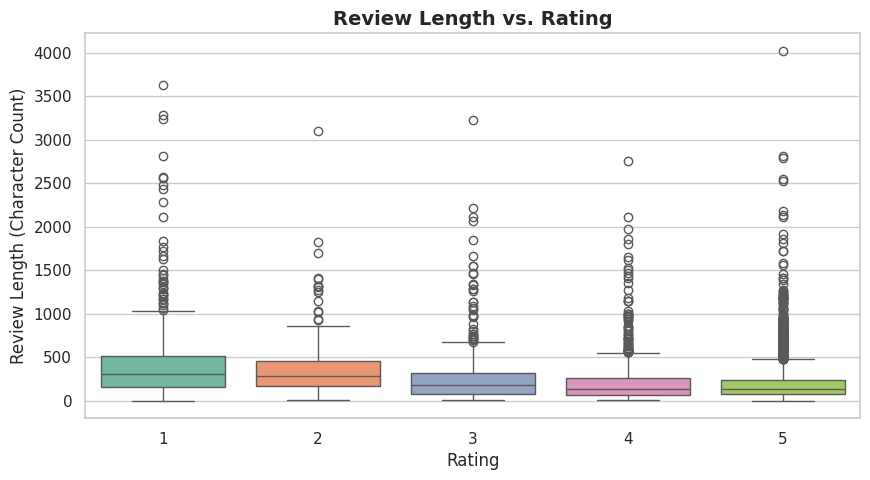

In [91]:
df_reviews_pandas = df_reviews.select("reviews", "rating").limit(10000).toPandas() #selecting reviews and ratings to plot and compare

df_reviews_pandas["reviews"] = df_reviews_pandas["reviews"].fillna("").astype(str) # finding all of the null values that are present
df_reviews_pandas["rating"] = df_reviews_pandas["rating"].fillna(0).astype(int) # filling in all the null values with this character

df_reviews_pandas["review_length"] = df_reviews_pandas["reviews"].apply(lambda x: len(x))

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_reviews_pandas["rating"], y=df_reviews_pandas["review_length"], palette="Set2") # using a comparative boxplot visualization
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Review Length (Character Count)", fontsize=12)
plt.title("Review Length vs. Rating", fontsize=14, fontweight='bold') # comparing review rating with review length
plt.show()

The figure below is a barplot which shows the top 15 companies with the highest number of 1-star ratings. Out of these, Subway, McDonald’s, and Shell were in the top 3 spots. From this visualization, we were able to see that the food category was the most common when it came to 1-star ratings. This shows that customers care about the quality of the food they are receiving and businesses in the food industry would need to be more careful when running their business in order to reach the customer satisfaction levels in terms of quality, taste, and other important factors in the restaurant industry.

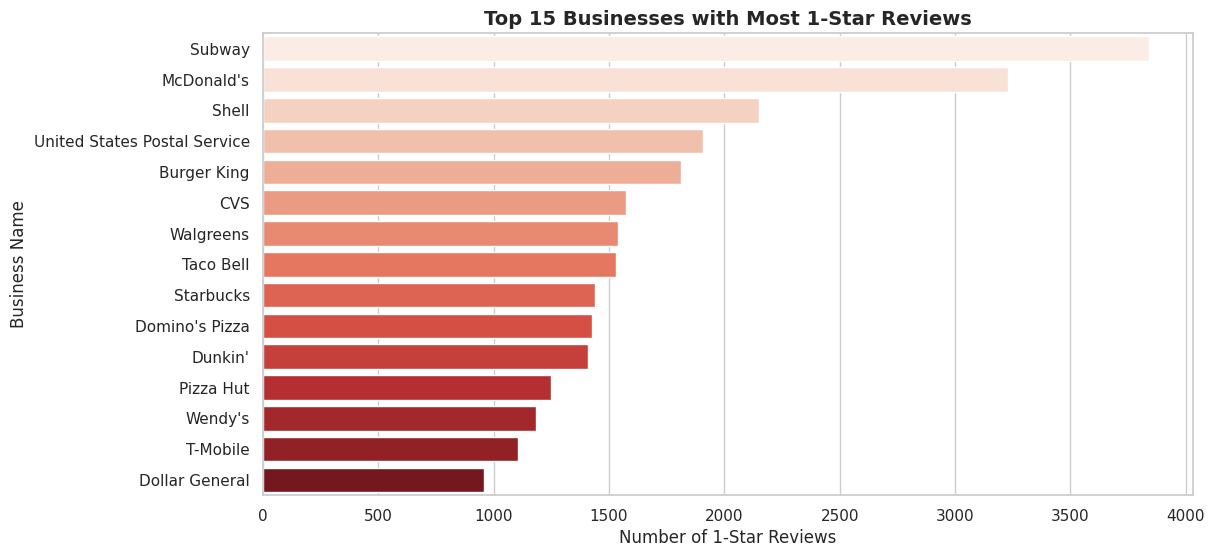

In [92]:
df_low_rated = df_reviews.filter(df_reviews["rating"] == 1).groupBy("business_name").count().orderBy("count", ascending=False).limit(15).toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_low_rated, x="count", y="business_name", palette="Reds") #using a red palette to show the lowest to highest rated businesses
plt.xlabel("Number of 1-Star Reviews", fontsize=12) # determining the x and y variables
plt.ylabel("Business Name", fontsize=12)
plt.title("Top 15 Businesses with Most 1-Star Reviews", fontsize=14, fontweight='bold') #limiting to top 15 businesses with most 1-star reviews
plt.show()

The visualization below is barplot in which it can be seen that the states with the lowest ratings are Alabama, Arizona, and Arkansas. A majority of the states that have made the top 10 list of states with the lowest average ratings are in the Southern and Southwest regions of the United States. This shows that businesses in these states are not performing optimally and new businesses opening in these locations should ensure that all the customer satisfaction metrics are being met.


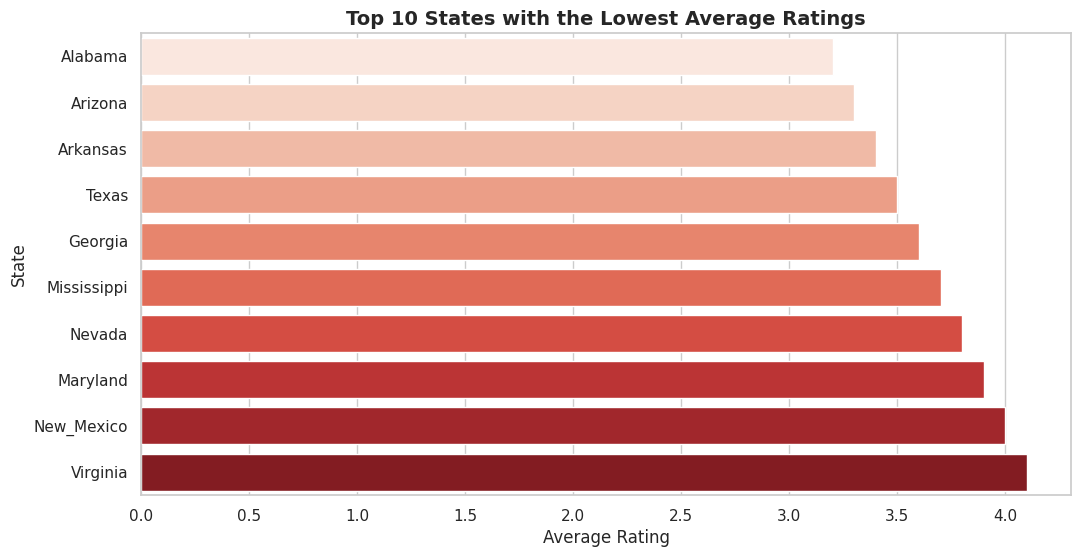

In [96]:
import pandas as pd
# importing the necessary modules
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "state": [
        "Alabama", "Arizona", "Arkansas", "Texas", "Georgia",
        "Mississippi", "Nevada", "Maryland", "New_Mexico", "Virginia"
    ],
    "rating": [3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1] # average ratings extracted from each of the states present in the dataset
}

df_state_ratings = pd.DataFrame(data) #using the pd.DataFrame function

plt.figure(figsize=(12, 6))
sns.barplot(data=df_state_ratings, x="rating", y="state", palette="Reds") #using a palette of red to show the difference between lowest and highest rated
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("State", fontsize=12) #state is the varible in the y axis being compared
plt.title("Top 10 States with the Lowest Average Ratings", fontsize=14, fontweight='bold') # plotting the top 10 states out of 50

plt.show()


